In [231]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [232]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [233]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [235]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [236]:
df.shape

(10754, 22)

In [237]:
df['clean sheets'].head()

0    0.335463
1    0.207055
2    0.924658
3    0.000000
4    0.000000
Name: clean sheets, dtype: float64

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [238]:
# using YData to profile the dataset, and get a more comprehensive view of what im dealing with

# profile = ProfileReport(df, title="Profiling Report")
# profile

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

> This dataset was generated by scraping data from Transfermarkt on June 10, 2023.  for the seasons 2021-2022 and 2022-2023

Taken from their website on how data is collected:

> Data input, processing, and the uploading pictures is free of charge for all Transfermarkt users. We rely on the active support of our registered users, who support our voluntary data scouts with information and corrections.you will find a form to input or correct data from the corresponding page.

> To complete or correct a player's assists, for example, you have to edit the according match sheet. Performance data of players, managers, and referees is automatically calculated based on saved match sheets.

> Correction proposals are send to our data administrators via a form. It is always a good idea to include a short note on where you have your information from in the field "Notes to data admin".

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

> The data was scrapped in 2023, which is safe to assume that the information in it dates back to 2023. Due to no other source of such data and for lack of scrapping and data collecting, we will continue using this dataset.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


> Some inconsistencies within the data itself in just the column 'name' where most values have first and last name, while some of them have only one name.

> This will be ignored for now as I am expecting that this column will not serve us in our scope.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.





In [239]:
df.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [240]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

> since our goal with this lab is to develop a predictive model for players values, some columns need to be removed as they are not features we can use

> example: ['player'], ['name'], ['position_encoded'], ['winger']

In [241]:
df_new = df.drop(columns=['player', 'name', 'position_encoded', 'winger'])

In [242]:
df_new.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [243]:
df_new.duplicated().sum()

0

In [244]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [245]:
#Display number missing values per column
df_new.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [246]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [247]:
df_new.head(3)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000


In [248]:
# check columns types 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

> I will convert all numbers to floats in preparations for scaling the data before getting to developing the model

In [249]:
# converting from int to float
df_new['appearance'] = df_new['appearance'].astype(float)
df_new['minutes played'] = df_new['minutes played'].astype(float)
df_new['days_injured'] = df_new['days_injured'].astype(float)
df_new['games_injured'] = df_new['games_injured'].astype(float)
df_new['award'] = df_new['award'].astype(float)
df_new['current_value'] = df_new['current_value'].astype(float)
df_new['highest_value'] = df_new['highest_value'].astype(float)

In [250]:
# check columns types 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  float64
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  float64
 13  days_injured         10754 non-null  float64
 14  games_injured        10754 non-null  float64
 15  award                10754 non-null 

In [251]:
# go to clean them 

In [252]:
# check outliers 

In [253]:
# using YData to profile the dataset, and get a more comprehensive view of what im dealing with

# profile = ProfileReport(df_new, title="Profiling Report")
# profile

In [254]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [255]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [256]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  float64
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  float64
 13  days_injured         10754 non-null  float64
 14  games_injured        10754 non-null  float64
 15  award                10754 non-null 

In [257]:
df_new.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

In [258]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
numerical_feats = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

cetegorical_feats = ['team', 'position']

In [259]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


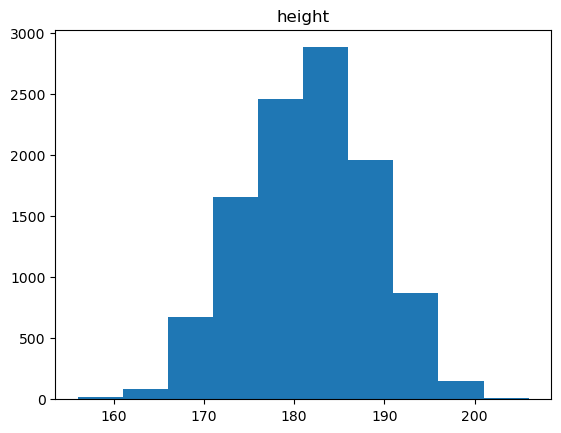

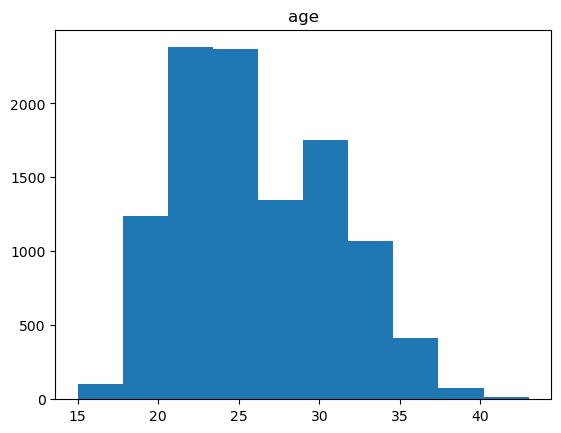

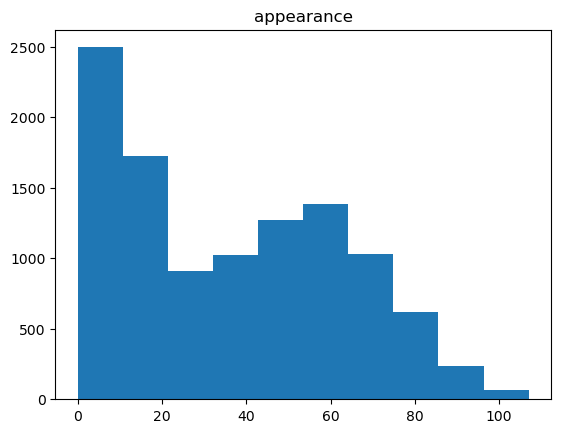

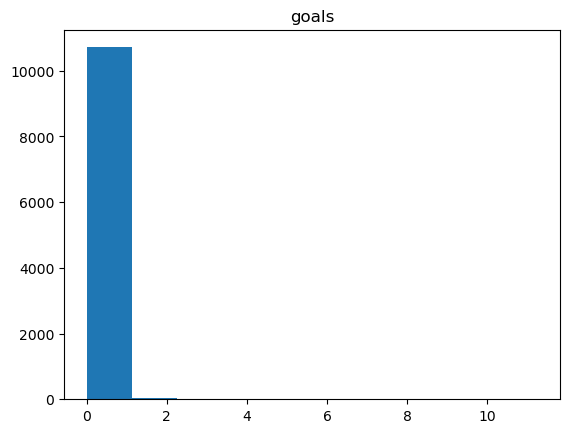

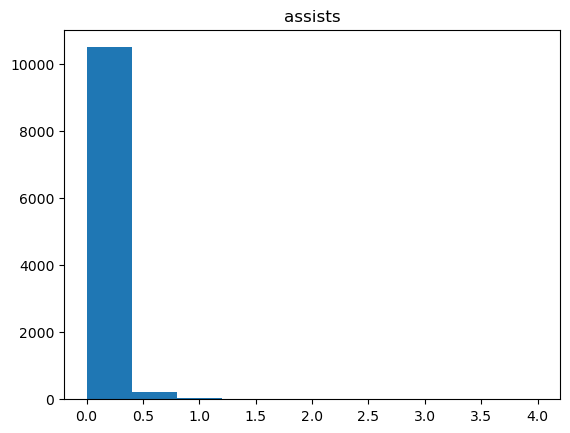

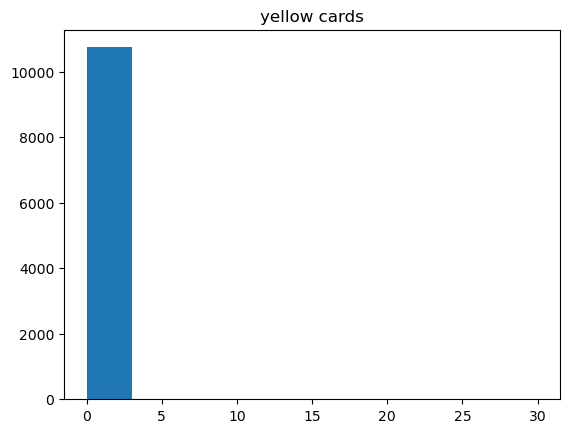

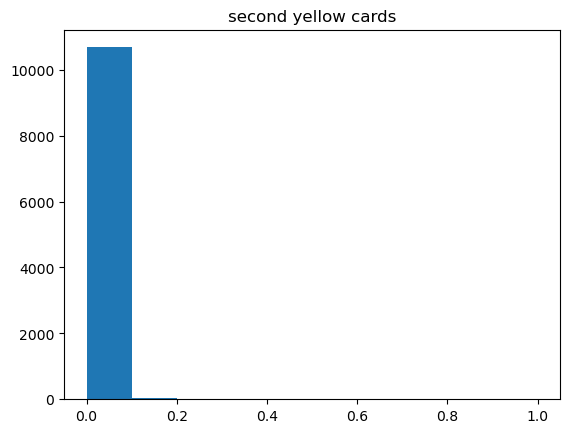

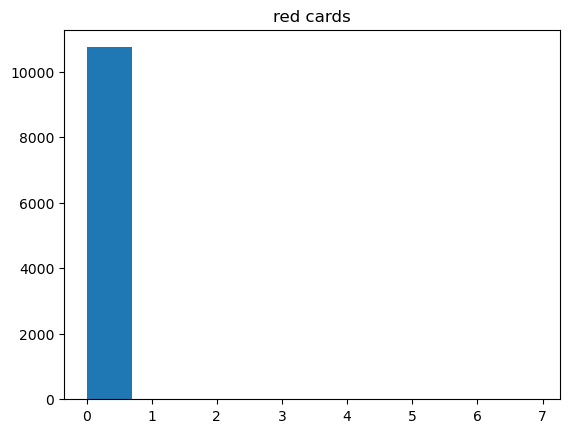

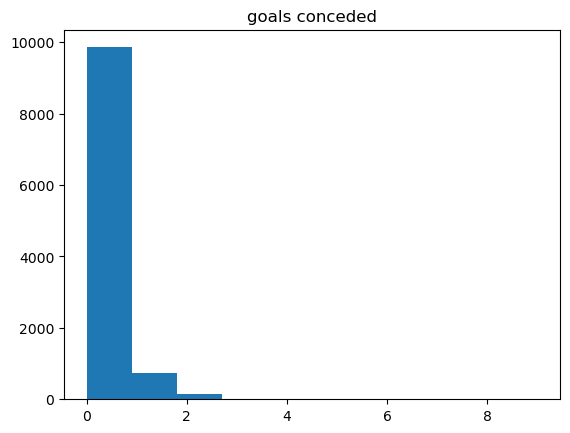

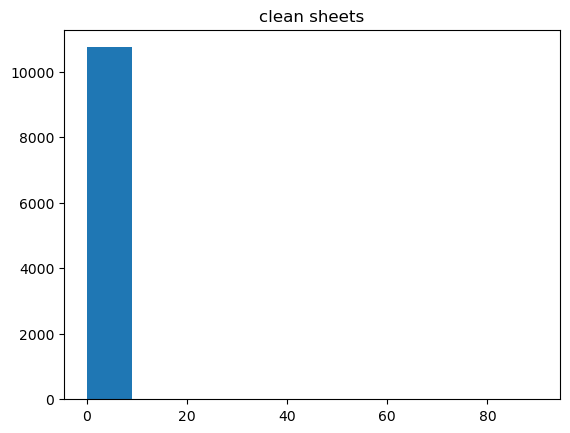

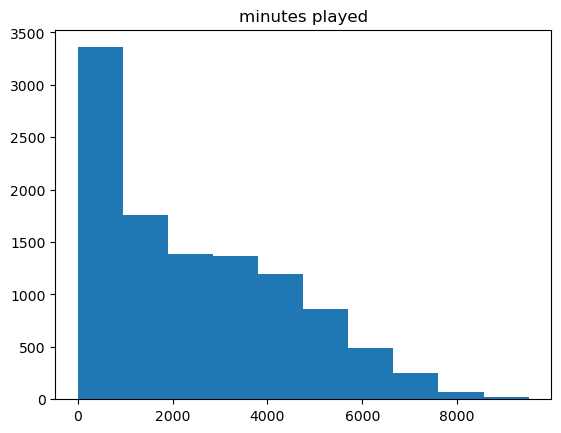

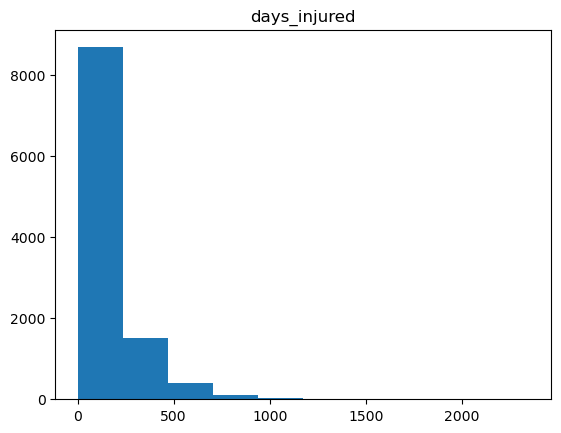

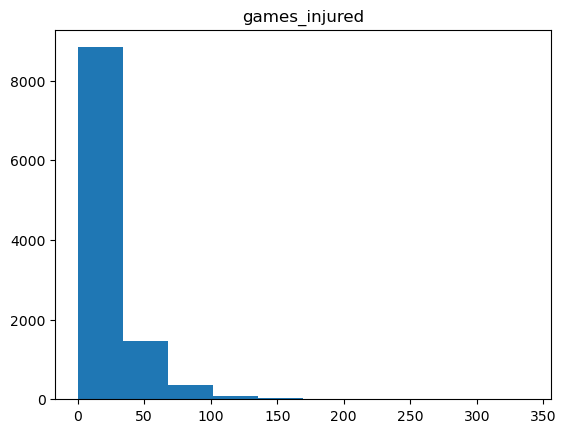

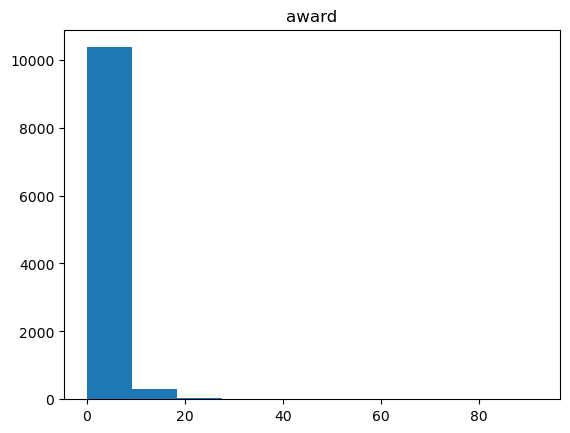

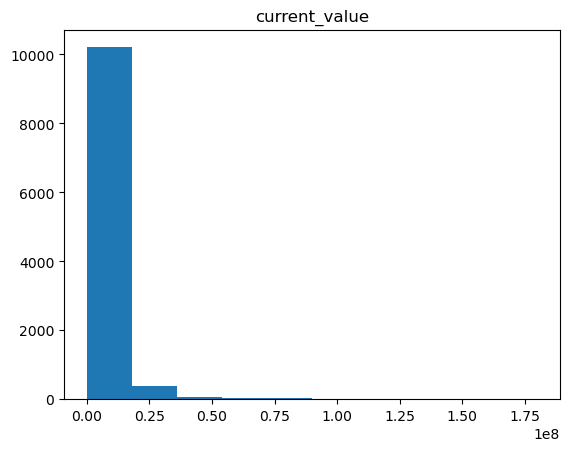

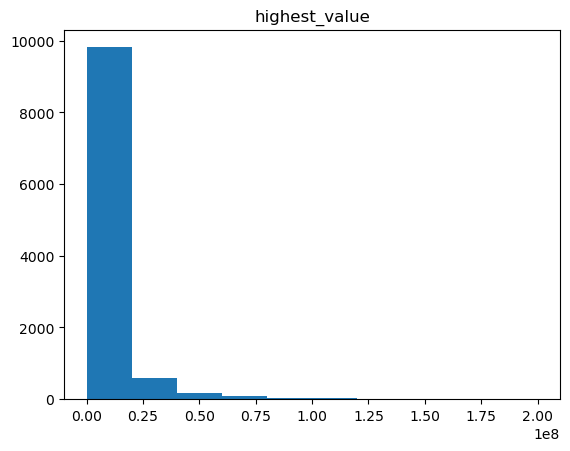

In [260]:
# looping through the numerical columns and plotting them
# to help detect outliers
for i in numerical_feats:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [261]:
df_new.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

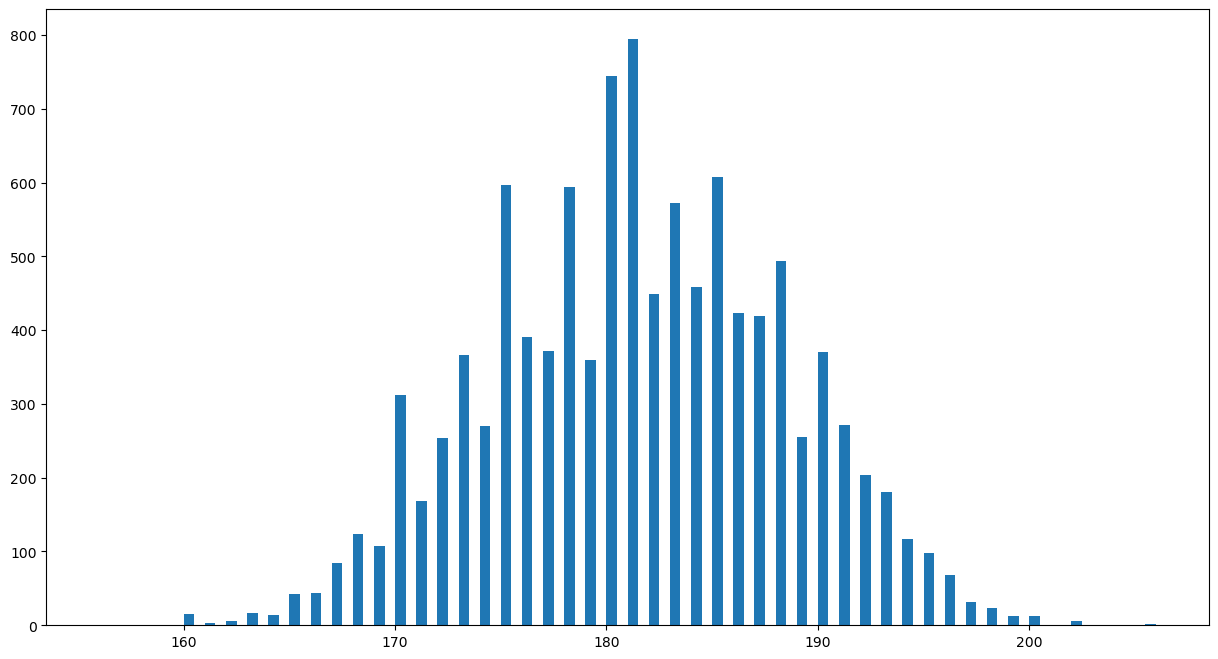

In [262]:
# plotting the column 'height' to detect outliers
plt.figure(figsize=(15,8))
plt.hist(df_new['height'], bins=100);

In [263]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[(df_new['height'] >= 160) & (df_new['height'] < 204)]

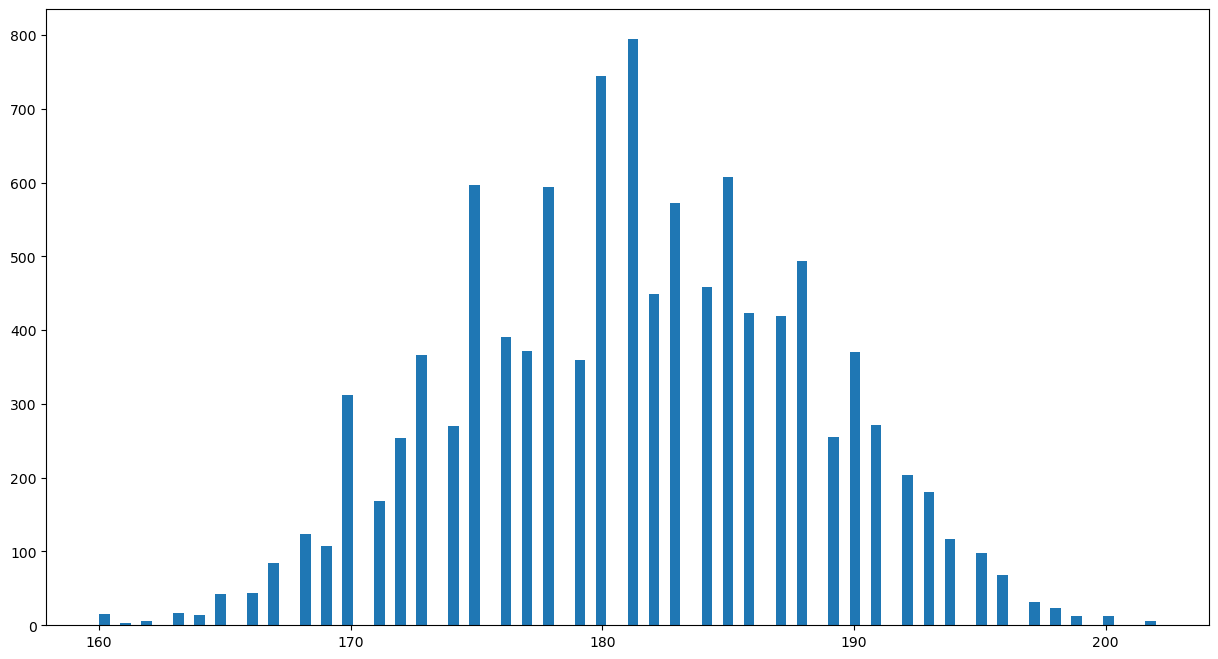

In [264]:
plt.figure(figsize=(15,8))
plt.hist(df_new2['height'], bins=100);

In [265]:
# cutting outliers less than 160, and higher than 204 to achieve a more normal distribution
df_new = df_new[(df_new['height'] >= 160) & (df_new['height'] < 204)]

In [266]:
df_new.shape

(10749, 18)

In [267]:
df_new.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

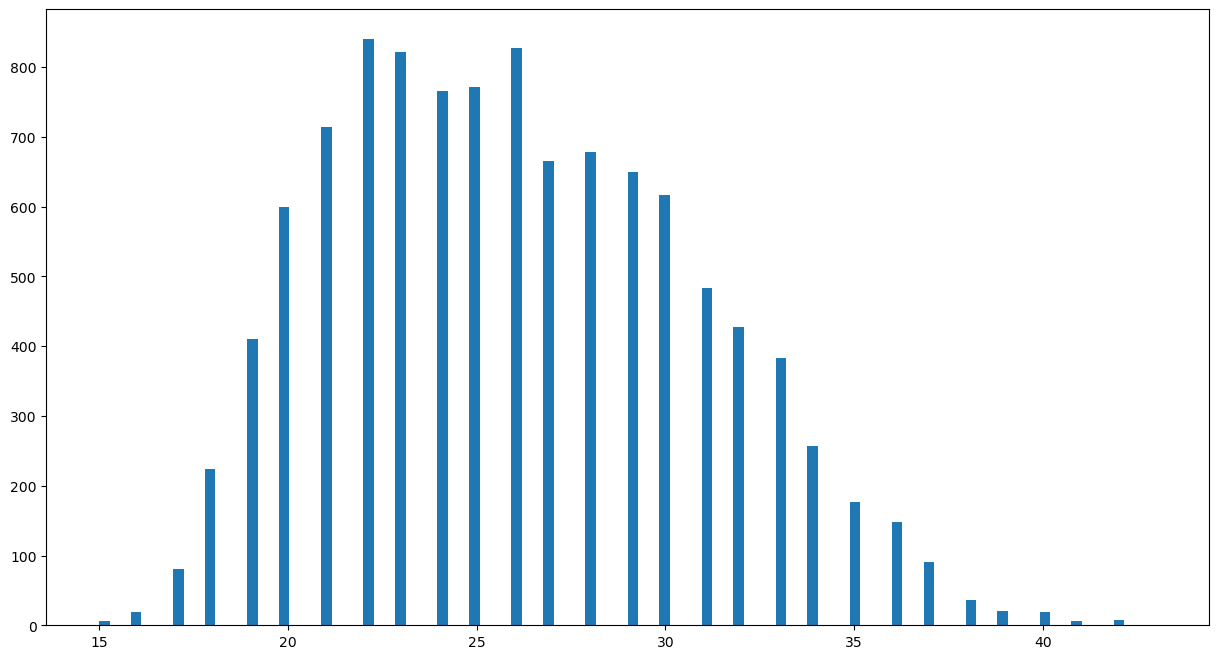

In [268]:
# plotting the column 'age' to detect outliers
plt.figure(figsize=(15,8))
plt.hist(df_new['age'], bins=100);

In [269]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[(df_new['age'] >= 16) & (df_new['age'] <= 40)]

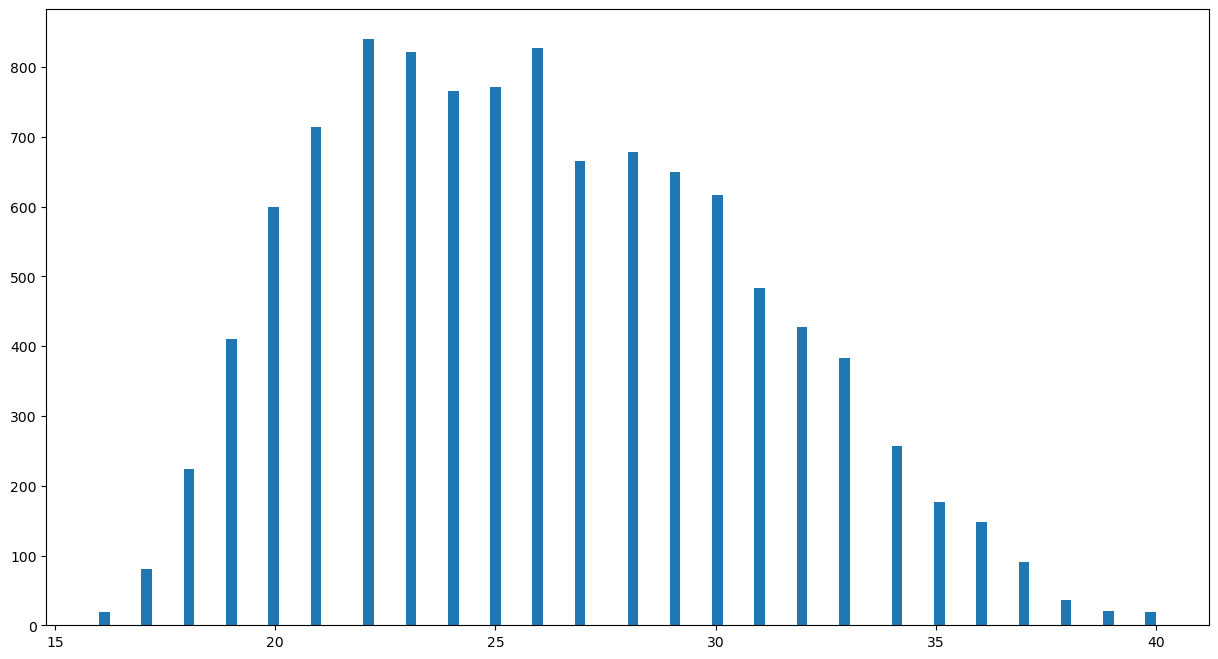

In [270]:
# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['age'], bins=100);

In [271]:
# committing changes
# # cutting age outliers less than 16, and higher than 40 to achieve a more normal distribution
df_new = df_new[(df_new['age'] >= 16) & (df_new['age'] <= 40)]

In [272]:
df_new.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

In [273]:
df_new['appearance'].min()

0.0

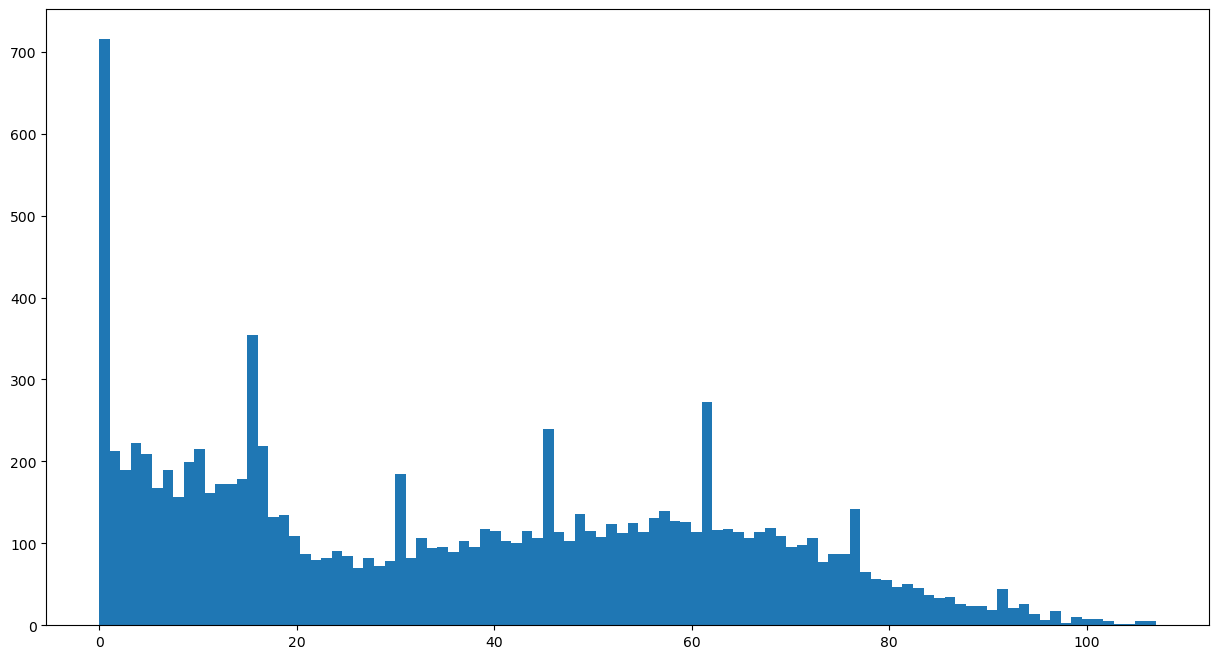

In [274]:
# checking outliers for the 'appearance'
plt.figure(figsize=(15,8))
plt.hist(df_new['appearance'], bins=100);

In [275]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[(df_new['appearance'] > 0 ) & (df_new['appearance'] <= 100)]

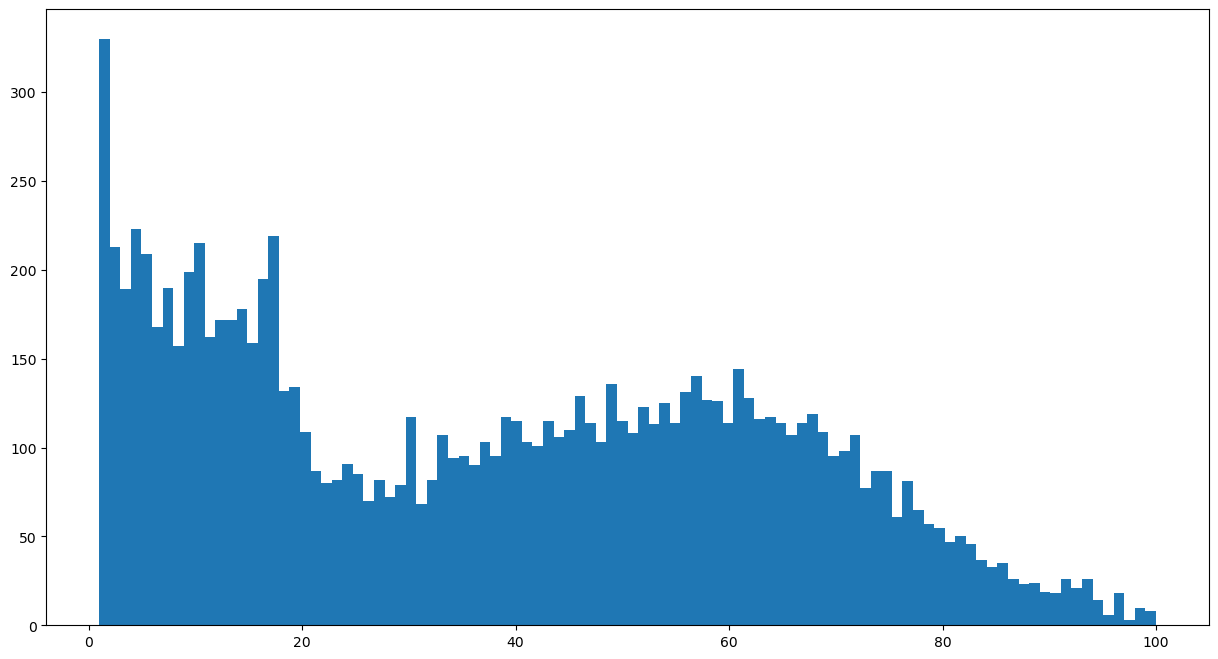

In [276]:
# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['appearance'], bins=100);

In [277]:
# committing changes
# # cutting appearance outliers where value is 0, and higher than 100 to achieve a more normal distribution

df_new = df_new[(df_new['appearance'] > 0 ) & (df_new['appearance'] <= 100)]

In [278]:
df_new.shape

(10317, 18)

In [279]:
df_new.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

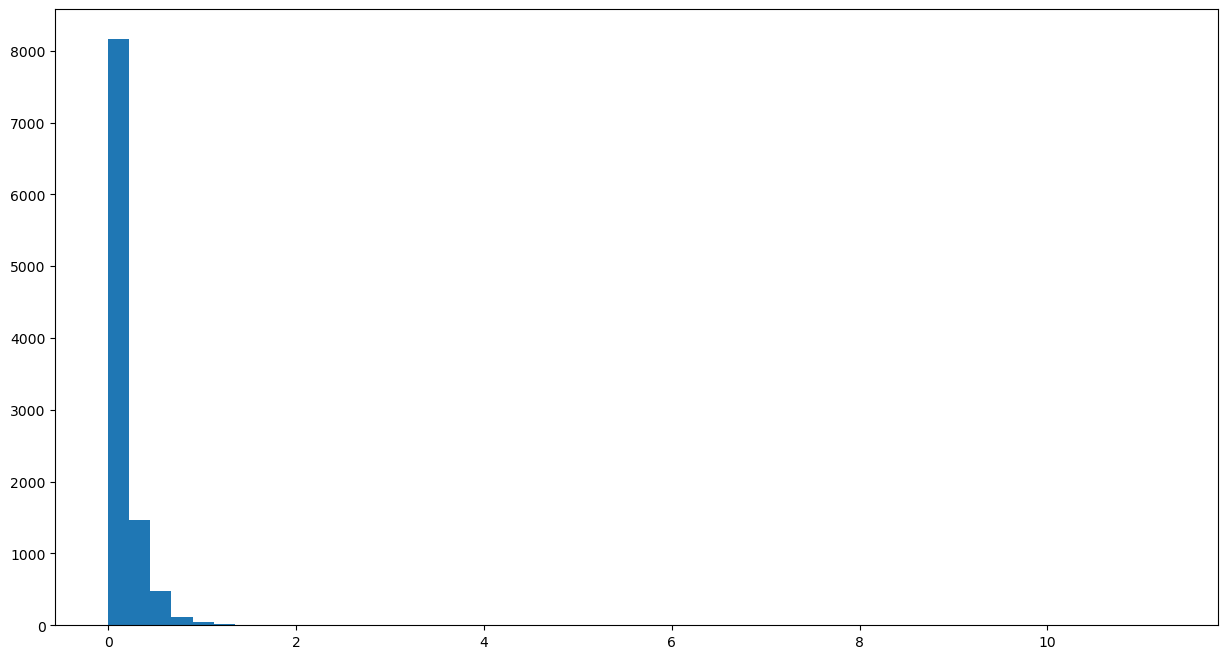

In [280]:
# checking outliers for the 'goals'
plt.figure(figsize=(15,8))
plt.hist(df_new['goals'], bins=50);

In [281]:
df_new['goals'].value_counts()

goals
0.000000    3943
1.000000      10
0.324910       8
0.230769       6
0.400000       6
            ... 
0.406895       1
0.270520       1
0.431568       1
0.183776       1
0.312139       1
Name: count, Length: 5306, dtype: int64

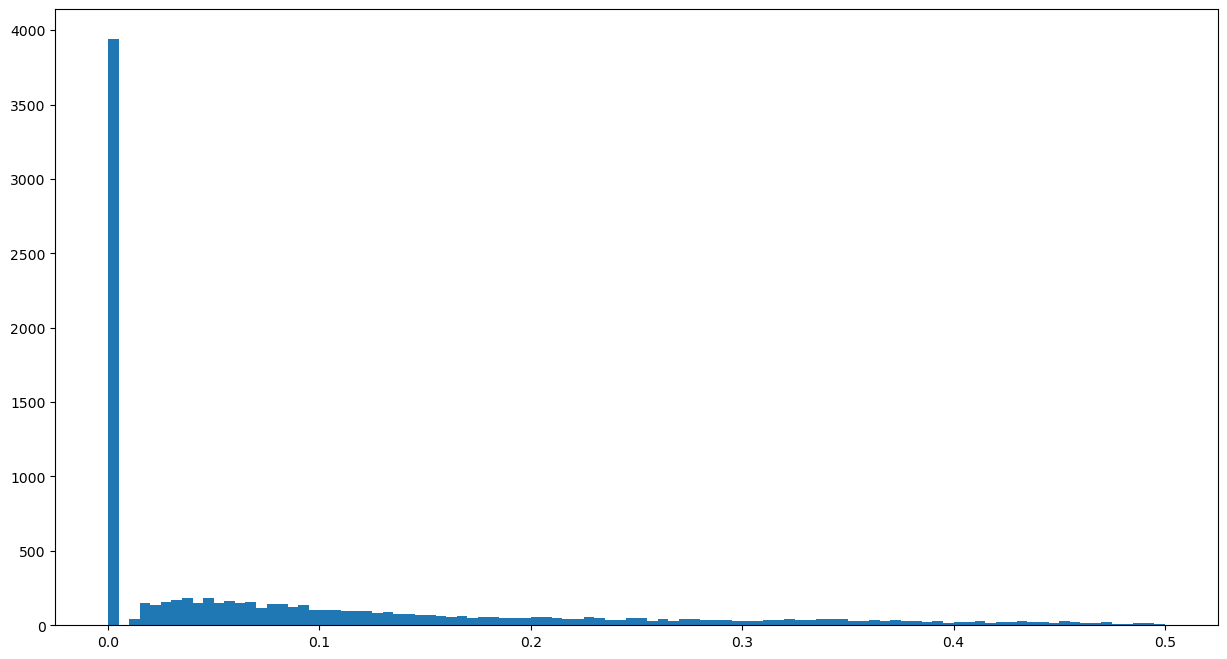

In [282]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['goals'] <= 0.5]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['goals'], bins=100);

In [283]:
df_new2.shape

(9797, 18)

In [284]:
# committing changes
# # cutting goals outliers higher than 0.5, and higher than 100 to achieve a more normal distribution
df_new = df_new[df_new['goals'] <= 0.5]

In [285]:
df_new.shape

(9797, 18)

In [286]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['assists'] <= 0.5]

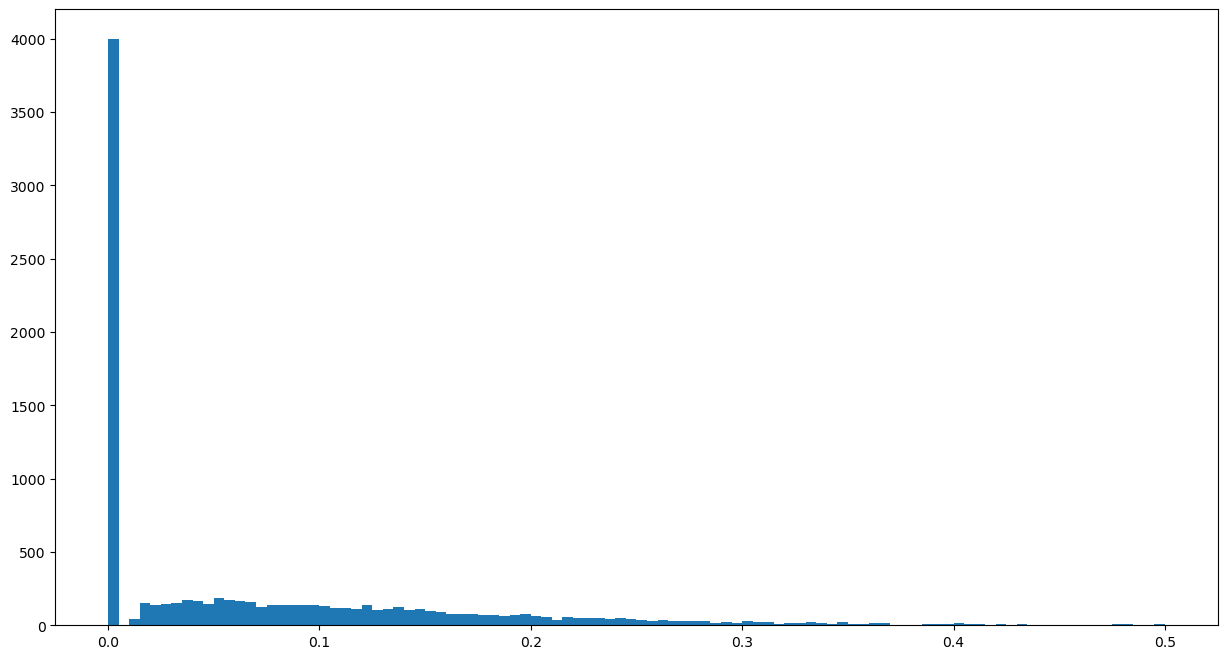

In [287]:
# checking outliers for the 'assists'
plt.figure(figsize=(15,8))
plt.hist(df_new2['assists'], bins=100);

In [288]:
# committing changes
# # cutting assists outliers higher than 0.35, to achieve a more normal distribution

df_new = df_new[df_new['assists'] <= 0.35]

In [289]:
df_new.shape

(9500, 18)

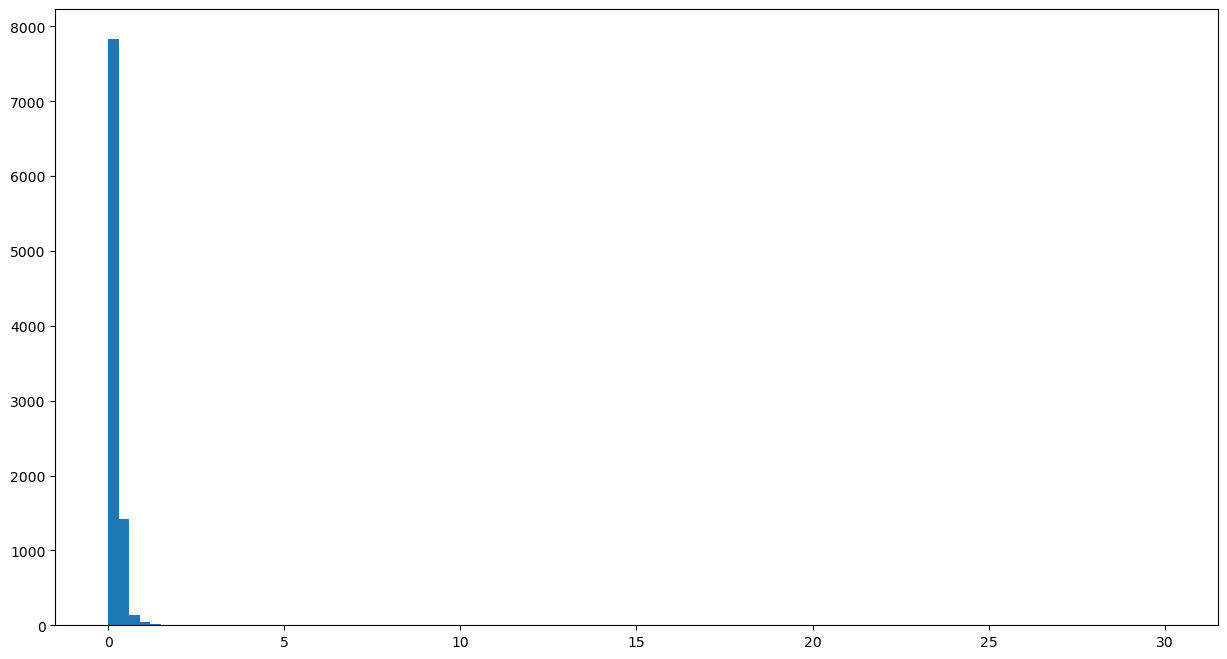

In [290]:
# checking outliers for the 'yellow cards'
plt.figure(figsize=(15,8))
plt.hist(df_new['yellow cards'], bins=100);

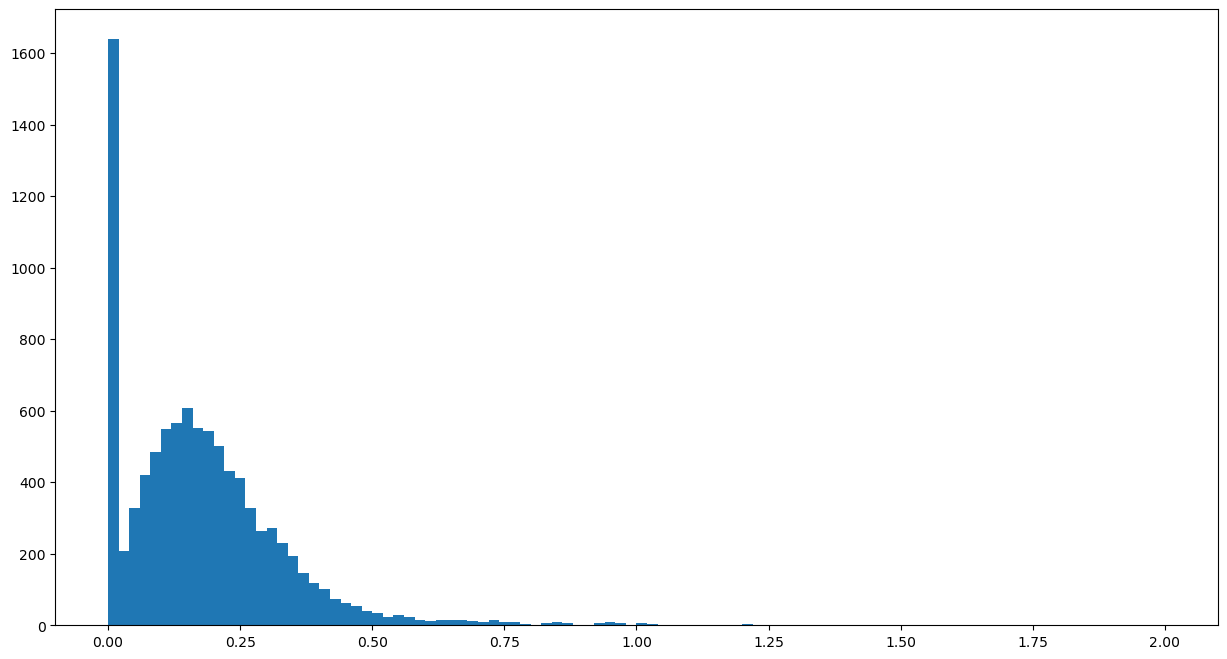

In [291]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['yellow cards'] <= 2]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['yellow cards'], bins=100);

In [292]:
# committing changes
# # cutting yellow cards outliers higher than 0.7 to achieve a more normal distribution

df_new = df_new[df_new['yellow cards'] <= 0.7]

In [293]:
df_new.shape

(9329, 18)

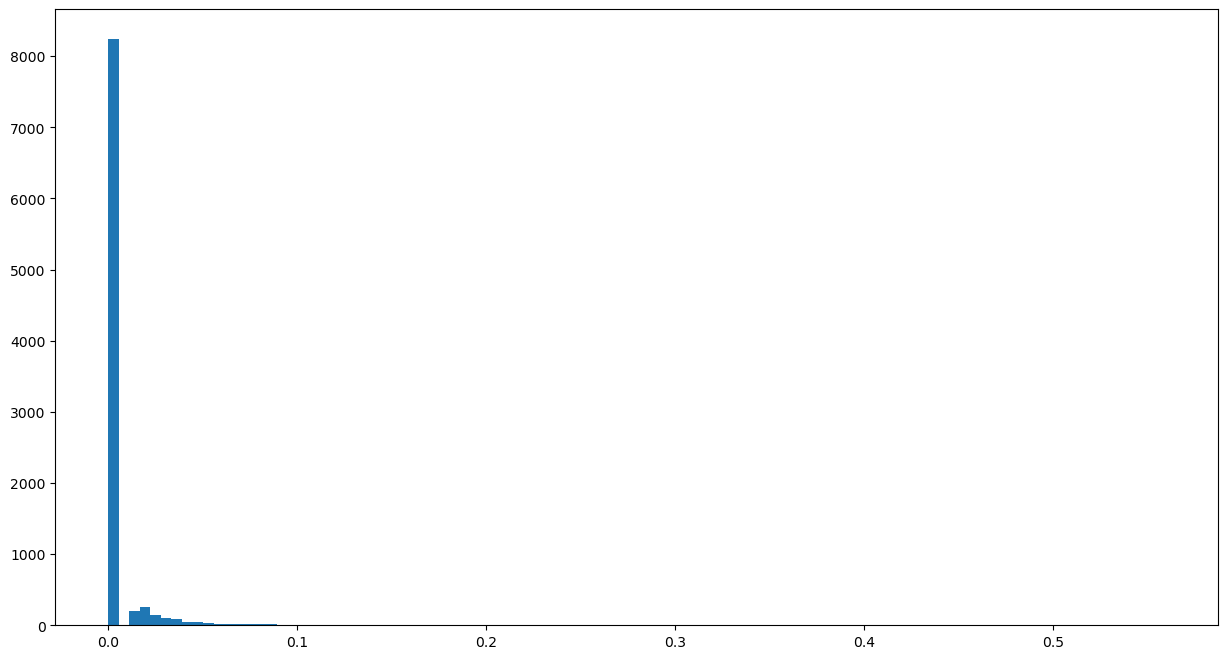

In [294]:
# checking outliers for the 'appearance'
plt.figure(figsize=(15,8))
plt.hist(df_new['second yellow cards'], bins=100);

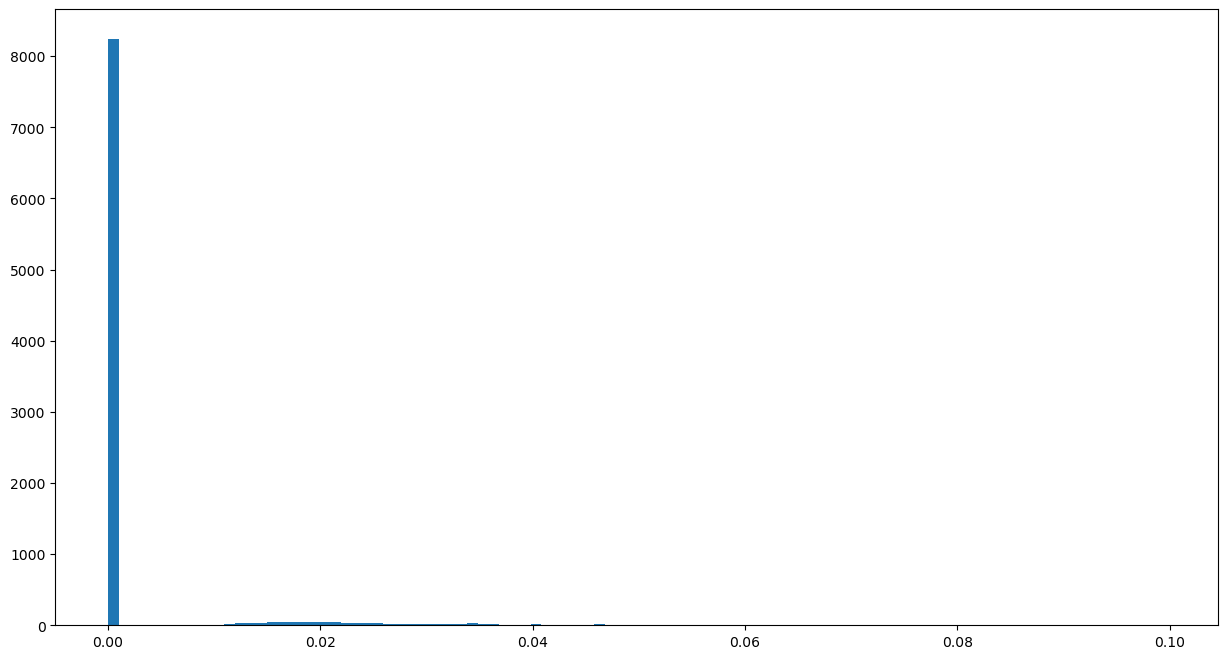

In [295]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['second yellow cards'] <= 0.1]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['second yellow cards'], bins=100);

In [296]:
# committing changes
# # cutting second yellow cards outliers higher than 0.3 to achieve a more normal distribution

df_new = df_new[df_new['second yellow cards'] <= 0.3]

In [297]:
df_new.shape

(9321, 18)

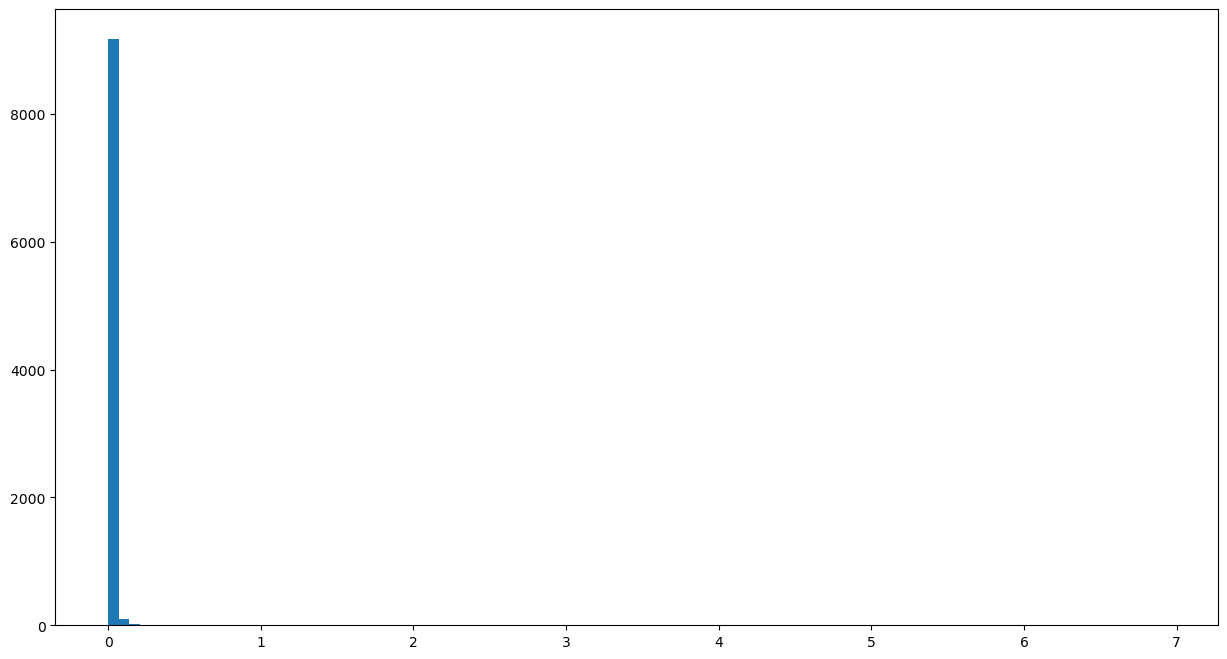

In [298]:
# checking outliers for the 'red cards'
plt.figure(figsize=(15,8))
plt.hist(df_new['red cards'], bins=100);

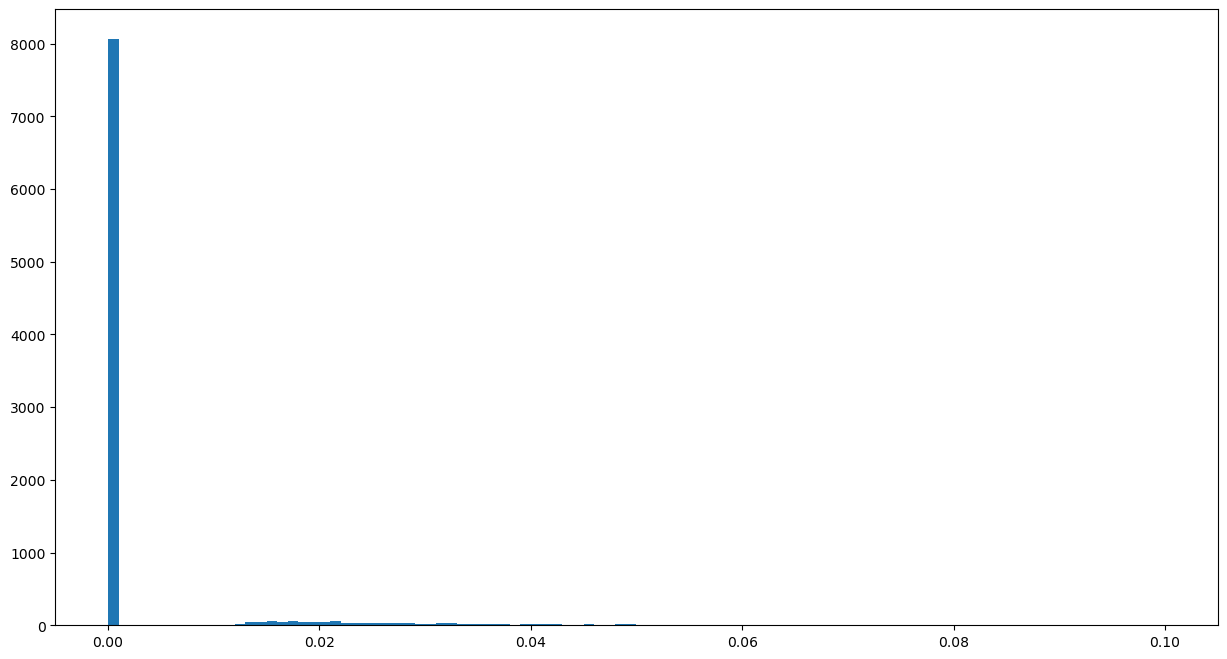

In [299]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['red cards'] <= 0.1]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['red cards'], bins=100);

In [300]:
# committing changes
# # cutting red cards outliers higher than 0.3 to achieve a more normal distribution

df_new = df_new[df_new['red cards'] <= 0.3]

In [301]:
df_new.shape

(9301, 18)

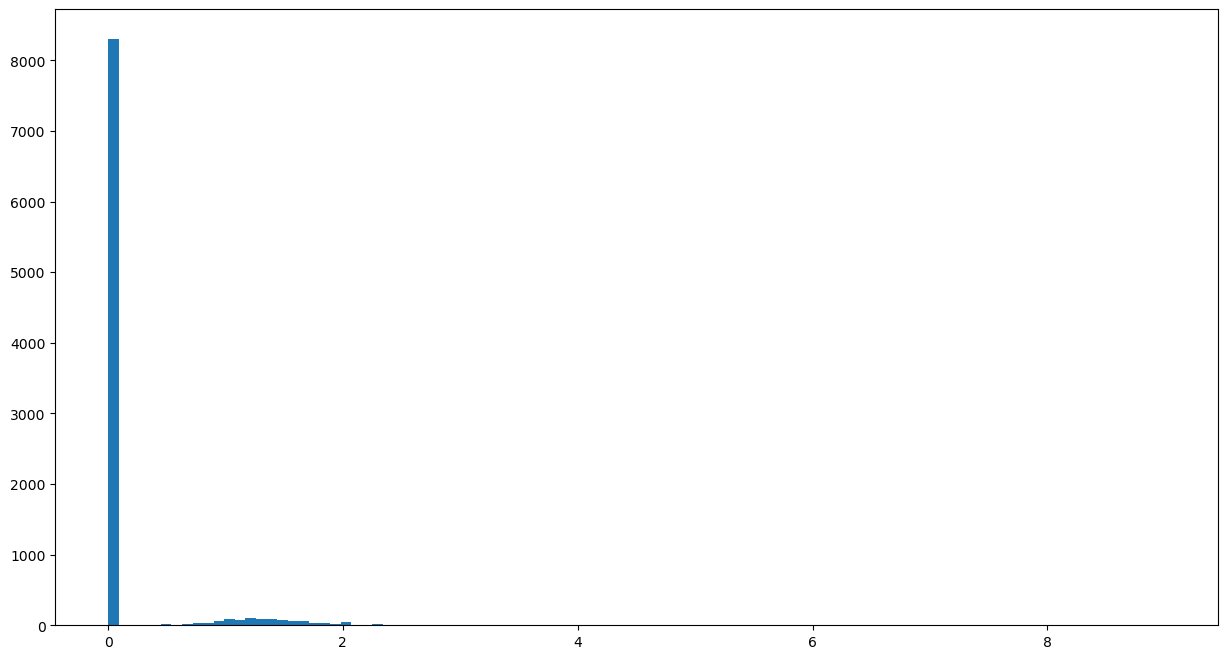

In [302]:
# checking outliers for the 'goals conceded'
plt.figure(figsize=(15,8))
plt.hist(df_new['goals conceded'], bins=100);

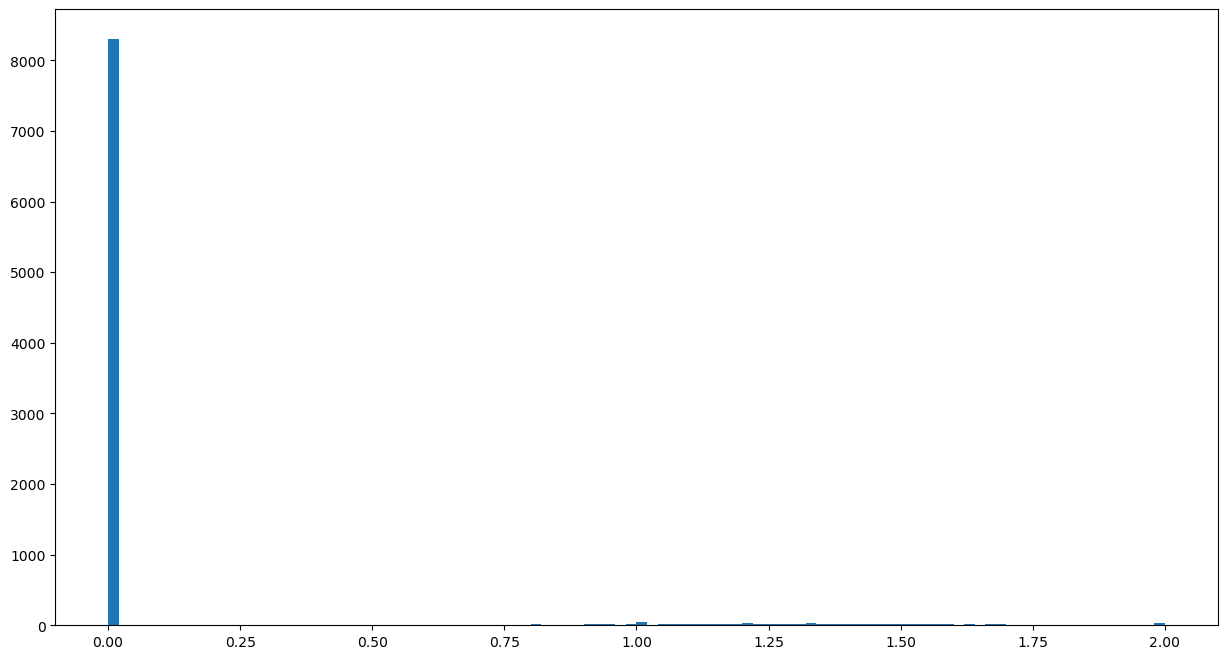

In [303]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['goals conceded'] <= 2]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['goals conceded'], bins=100);

In [304]:
# committing changes
# # cutting goals conceded outliers higher than 1.6 to achieve a more normal distribution

df_new = df_new[df_new['goals conceded'] <= 1.6]

In [305]:
df_new.shape

(9048, 18)

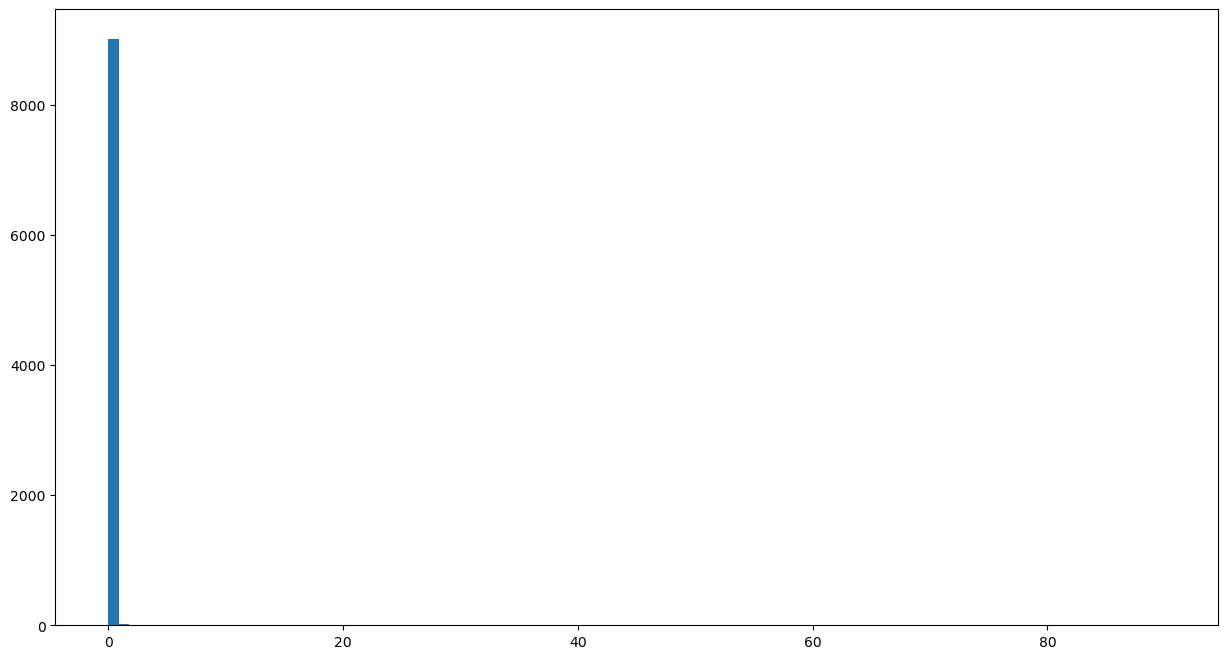

In [306]:
# checking outliers for the 'clean sheets'
plt.figure(figsize=(15,8))
plt.hist(df_new['clean sheets'], bins=100);

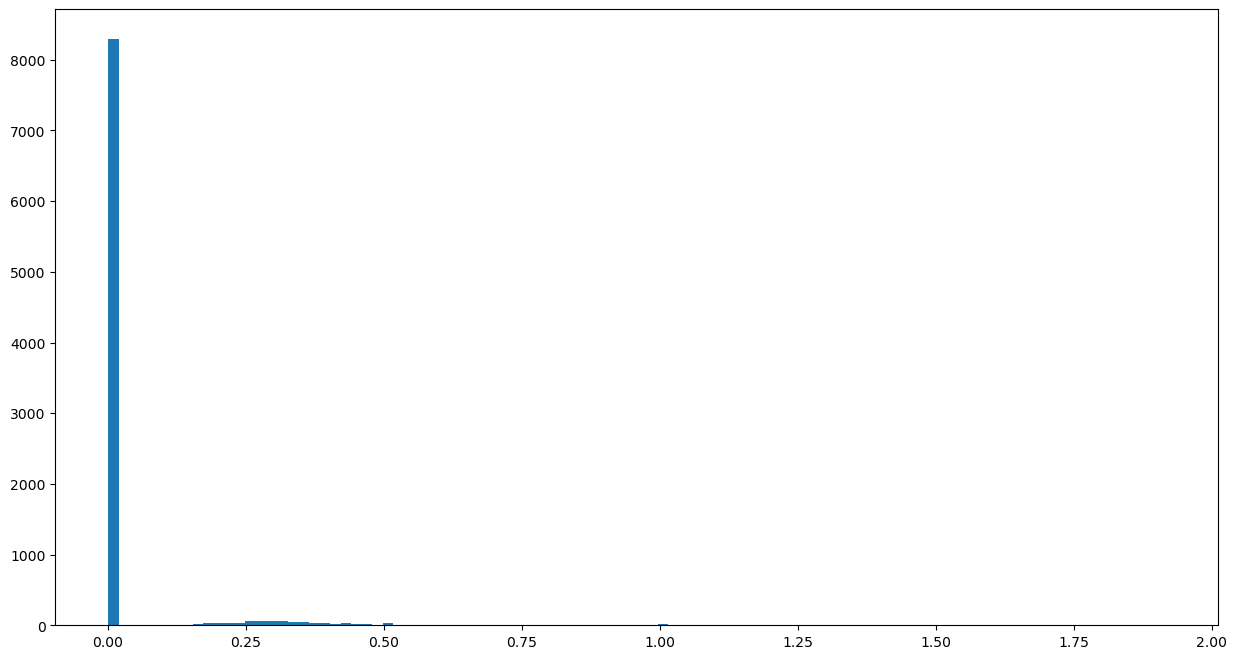

In [307]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['clean sheets'] <= 2]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['clean sheets'], bins=100);

In [308]:
# committing changes
# # cutting clean sheets outliers higher than 0.45 to achieve a more normal distribution

df_new = df_new[df_new['clean sheets'] <= 0.45]


In [309]:
df_new.shape

(8908, 18)

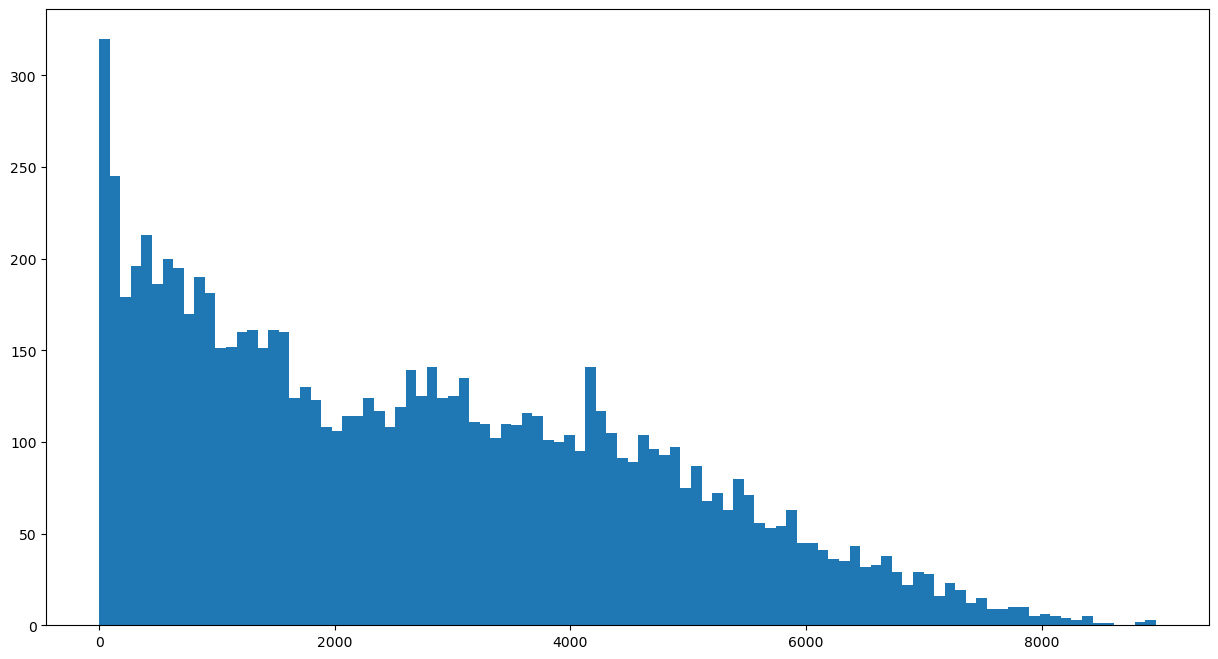

In [310]:
# checking outliers for the 'minutes played'
plt.figure(figsize=(15,8))
plt.hist(df_new['minutes played'], bins=100);

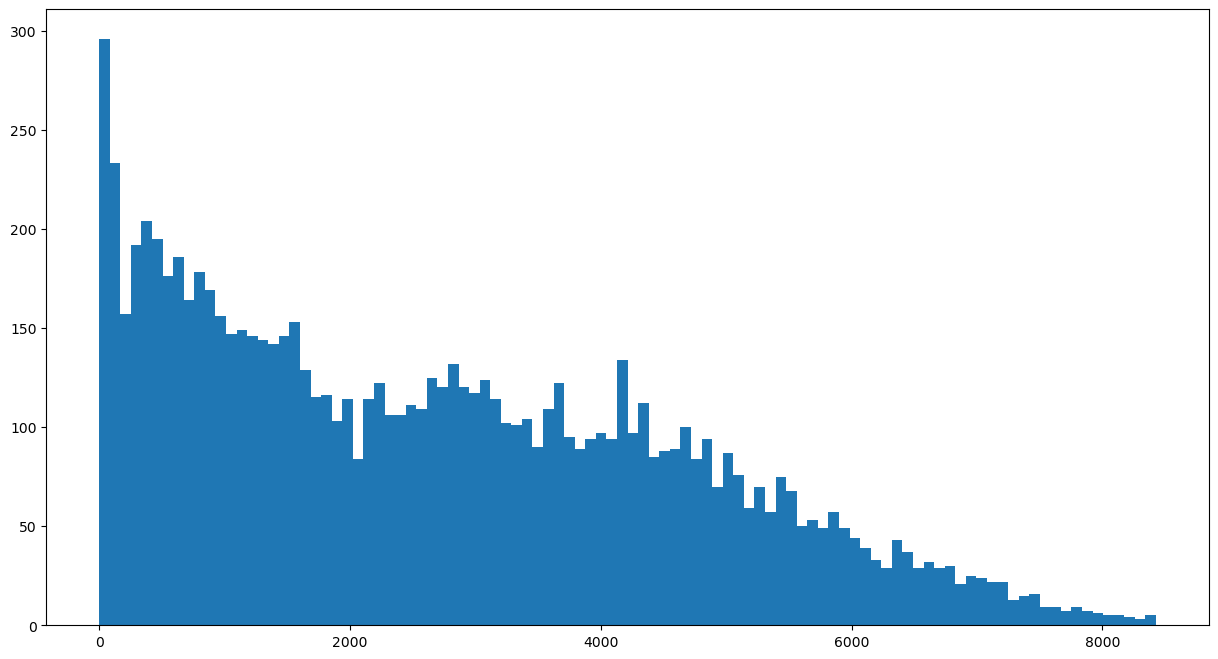

In [311]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[(df_new['minutes played'] > 0) & (df_new['minutes played'] <= 8500)]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['minutes played'], bins=100);

In [312]:
df_new2.shape

(8886, 18)

In [313]:
# committing changes
# # cutting minutes played outliers higher than 5, and less than 8500 minutes to achieve a more normal distribution

df_new = df_new[(df_new['minutes played'] > 5) & (df_new['minutes played'] <= 8500)]


In [314]:
df_new.shape

(8857, 18)

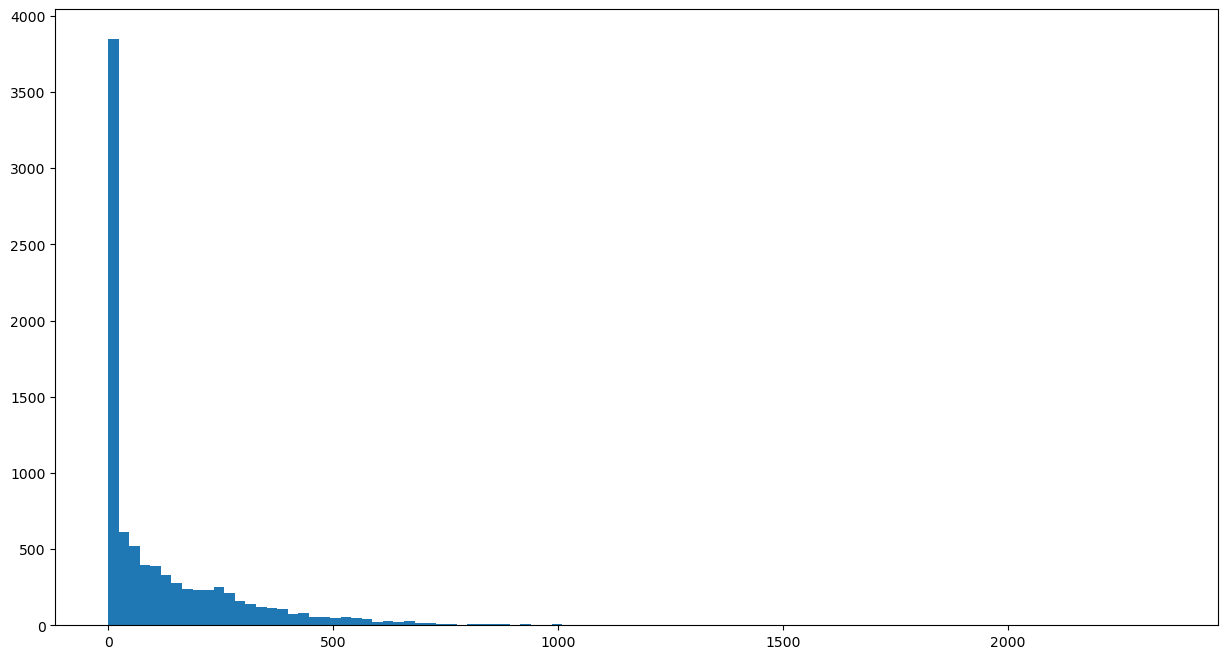

In [315]:
# checking outliers for the 'days_injured'
plt.figure(figsize=(15,8))
plt.hist(df_new['days_injured'], bins=100);

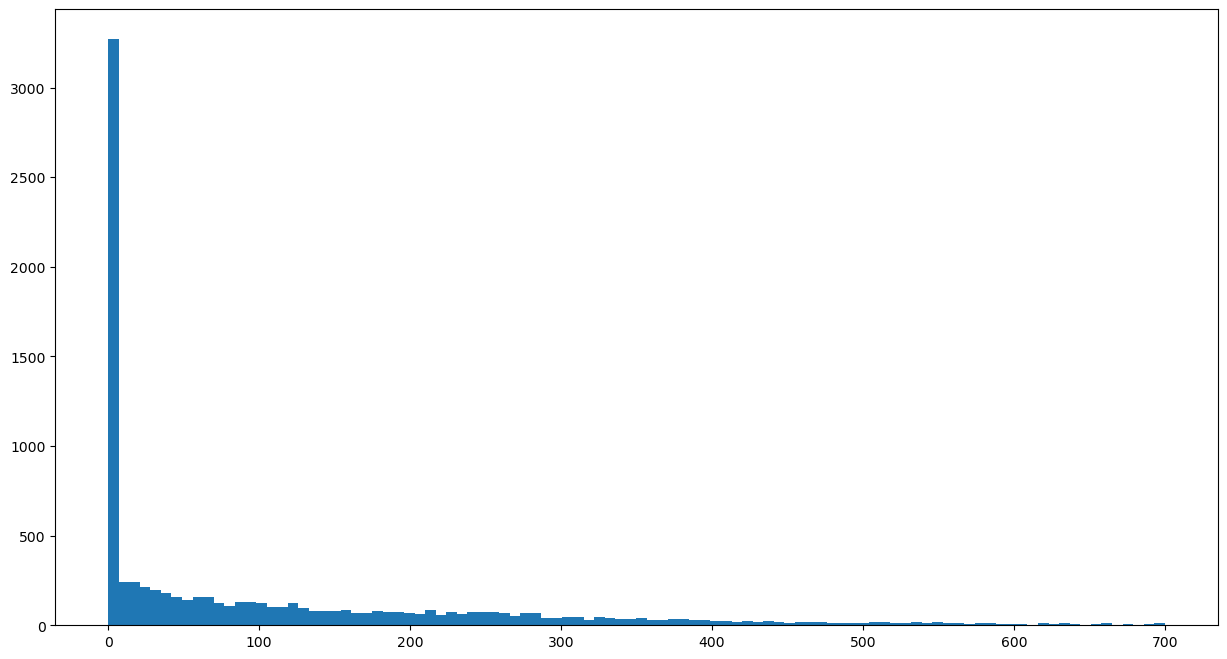

In [316]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['days_injured'] <= 700]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['days_injured'], bins=100);

In [317]:
# committing changes
# # cutting days_injured outliers  less than 500 to achieve a more normal distribution
df_new = df_new[df_new['days_injured'] <= 500]


In [318]:
df_new.shape

(8451, 18)

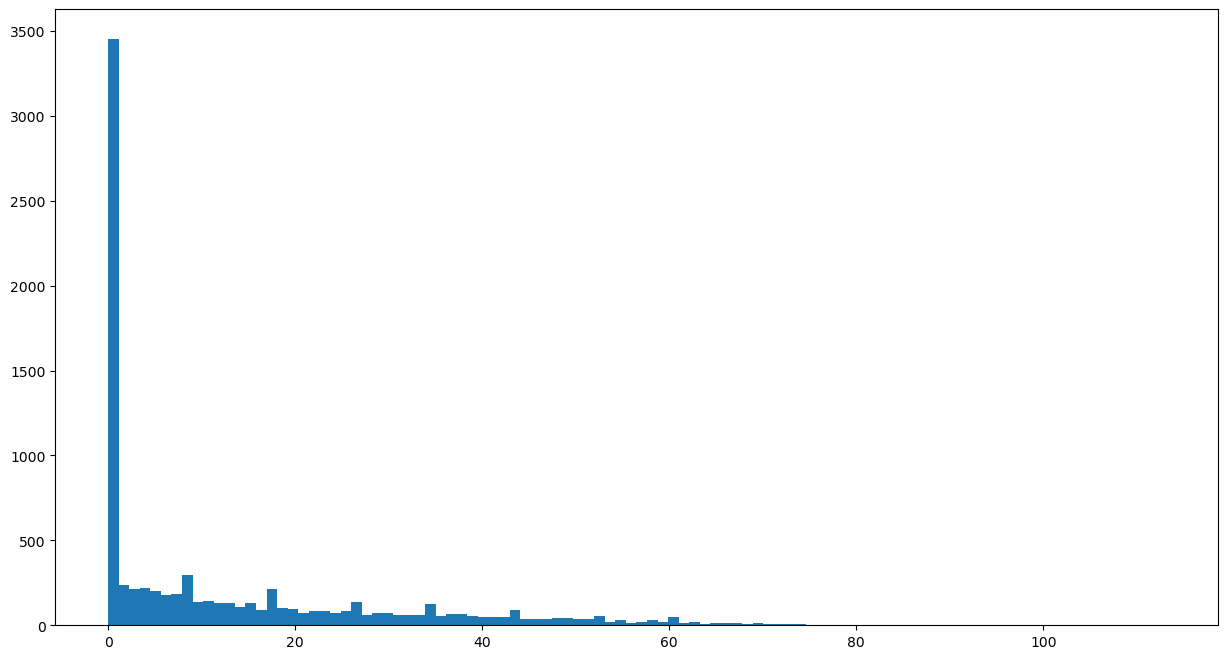

In [319]:
# checking outliers for the 'games_injured'
plt.figure(figsize=(15,8))
plt.hist(df_new['games_injured'], bins=100);

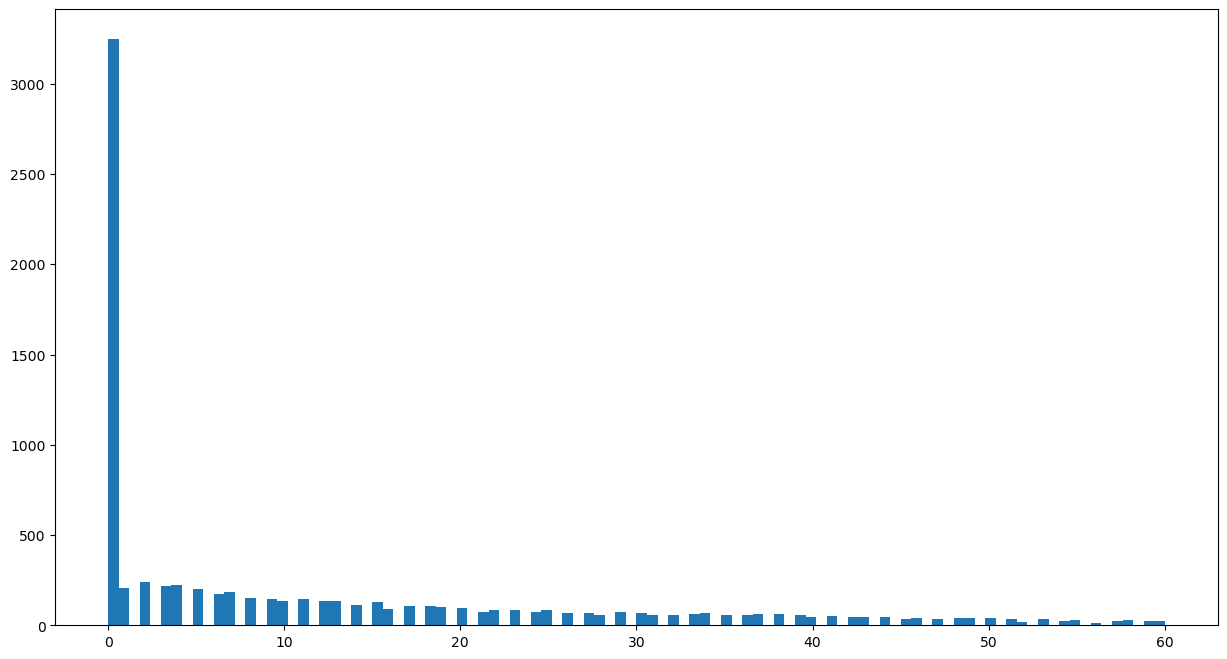

In [320]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['games_injured'] <= 60]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['games_injured'], bins=100);

In [321]:
df_new2.shape

(8279, 18)

In [322]:
# committing changes
# # cutting games_injured outliers higher than 50 to achieve a more normal distribution
df_new = df_new[df_new['games_injured'] <= 50]


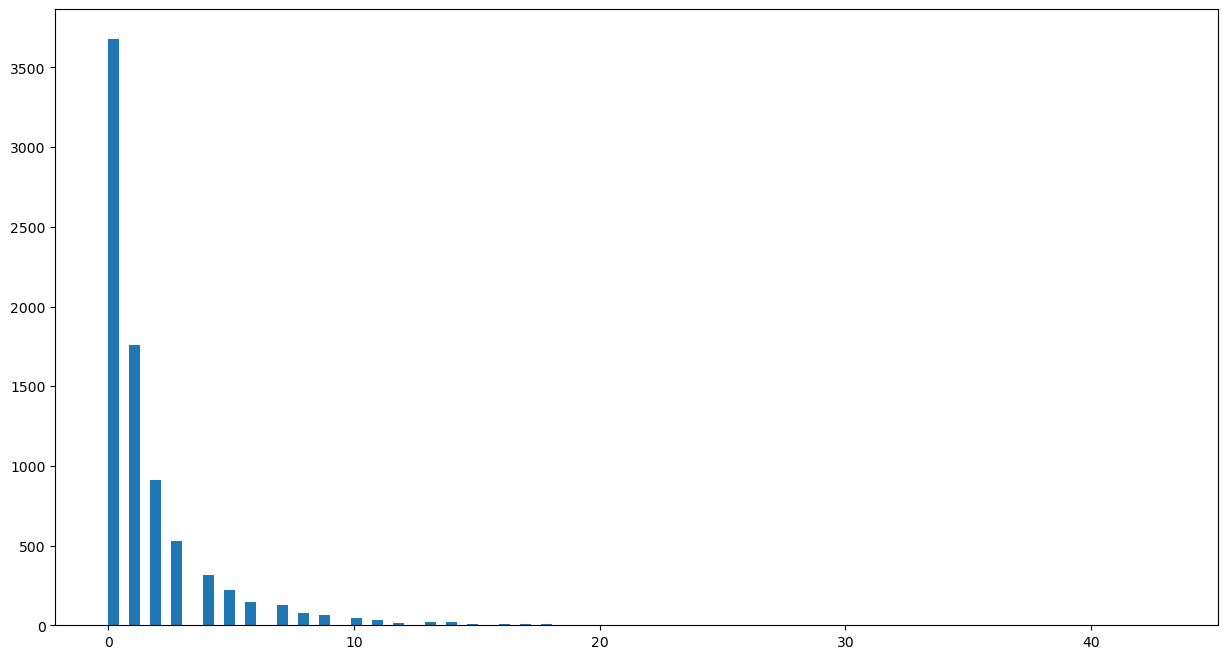

In [323]:
# checking outliers for the 'award'
plt.figure(figsize=(15,8))
plt.hist(df_new['award'], bins=100);

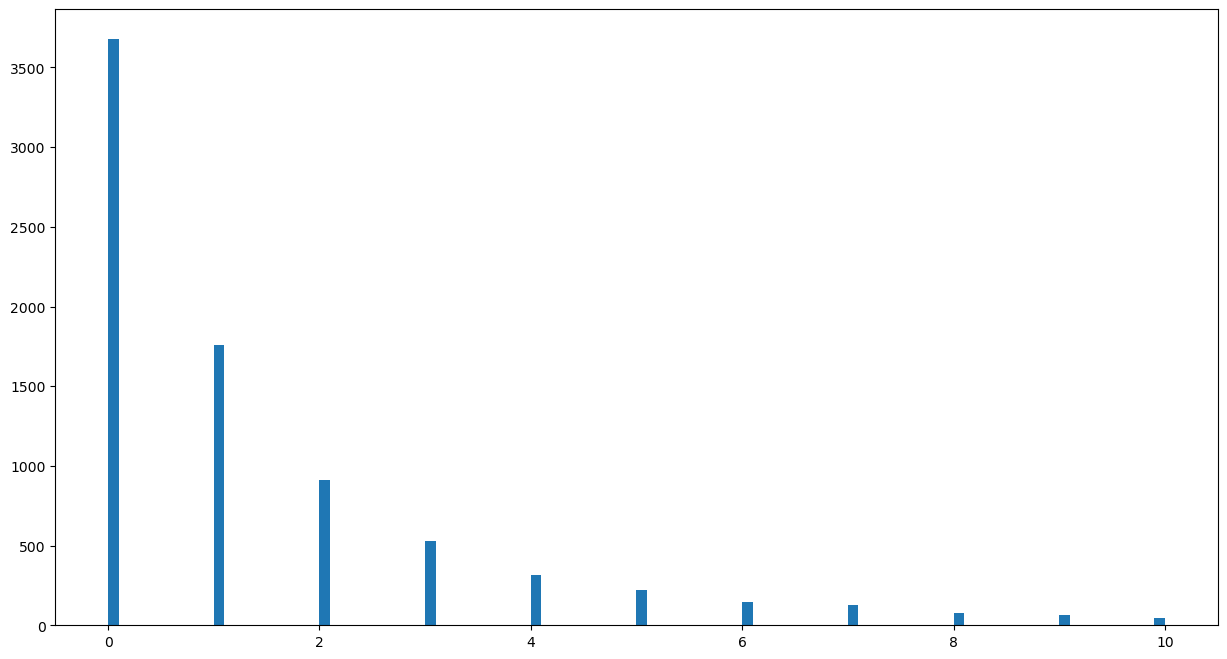

In [324]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['award'] <= 10]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['award'], bins=100);

In [325]:
# committing changes
# # cutting award outliers higher than 6 to achieve a more normal distribution
df_new = df_new[df_new['award'] <= 6]


In [326]:
df_new.shape

(7564, 18)

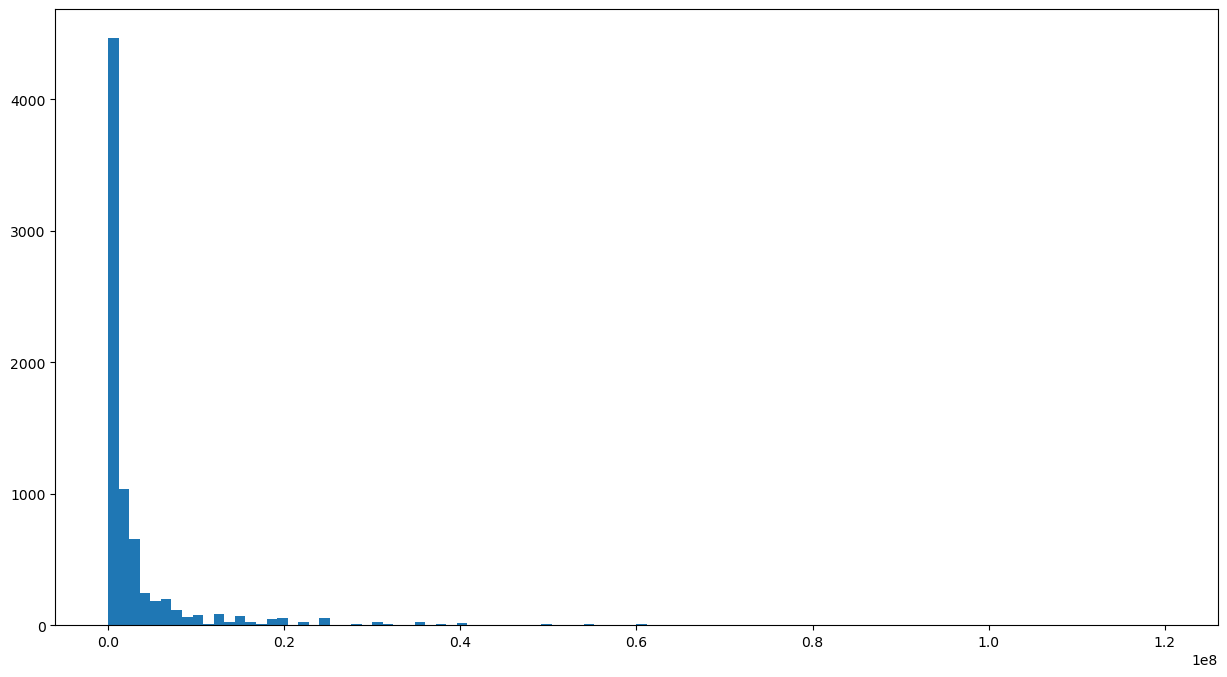

In [327]:
# checking outliers for the 'current_value'
plt.figure(figsize=(15,8))
plt.hist(df_new['current_value'], bins=100);

In [328]:
df_new['current_value'].tail()

10749     75000.0
10750    300000.0
10751     50000.0
10752     50000.0
10753     25000.0
Name: current_value, dtype: float64

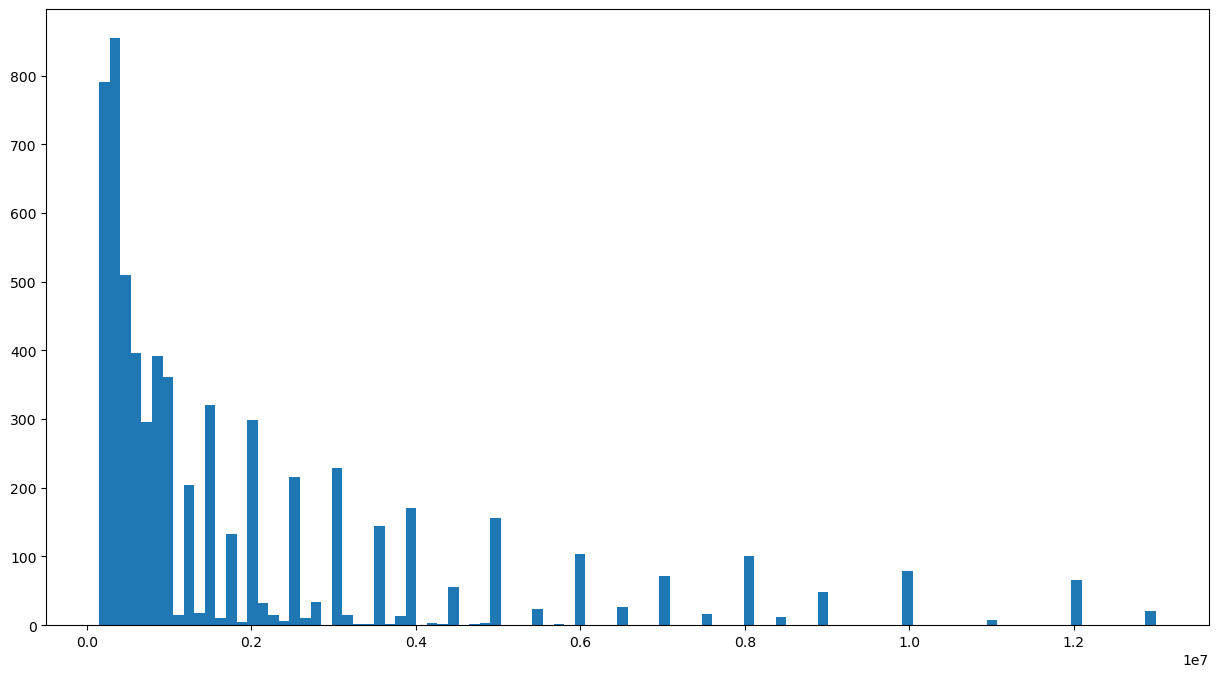

In [329]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[(df_new['current_value'] >= 150000) & (df_new['current_value'] <= 13000000)]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['current_value'], bins=100);

In [330]:
df_new2.shape

(6279, 18)

In [331]:
# committing changes
# # cutting current_value outliers higher than 200000, and less than 40000000 to achieve a more normal distribution
df_new = df_new[(df_new['current_value'] >= 200000) & (df_new['current_value'] <= 40000000)]


In [332]:
df_new.shape

(6433, 18)

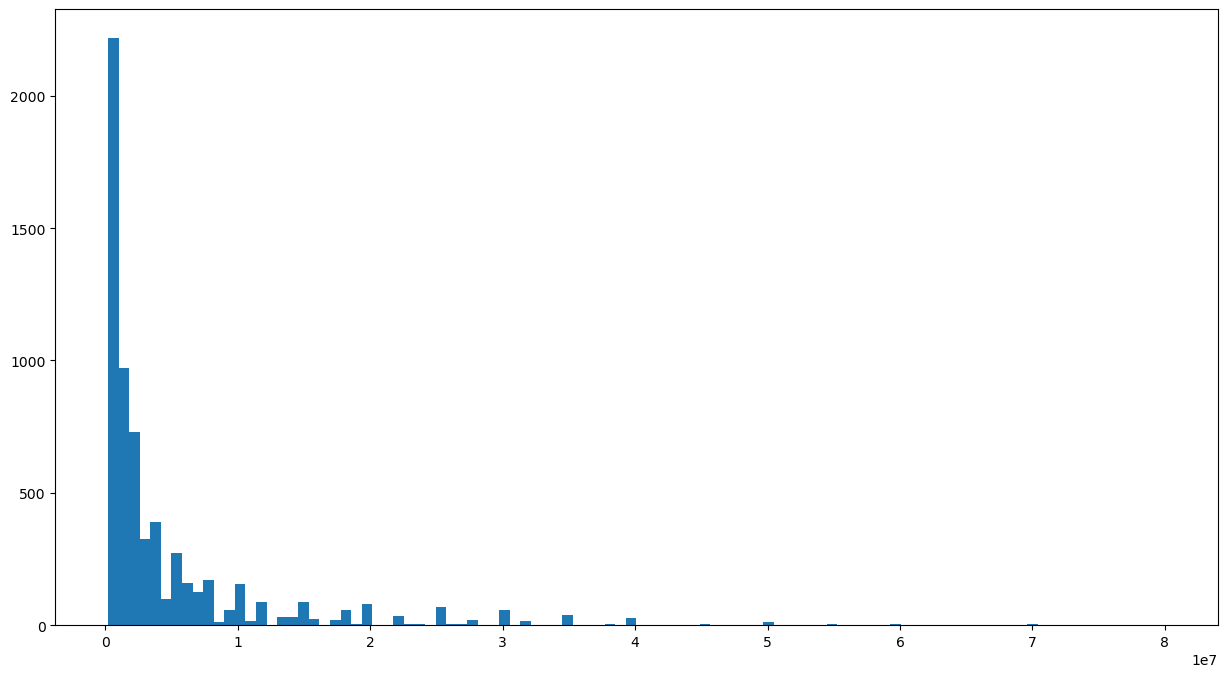

In [333]:
# checking outliers for the 'highest_value'
plt.figure(figsize=(15,8))
plt.hist(df_new['highest_value'], bins=100);

In [334]:
df_new['highest_value'].min()

200000.0

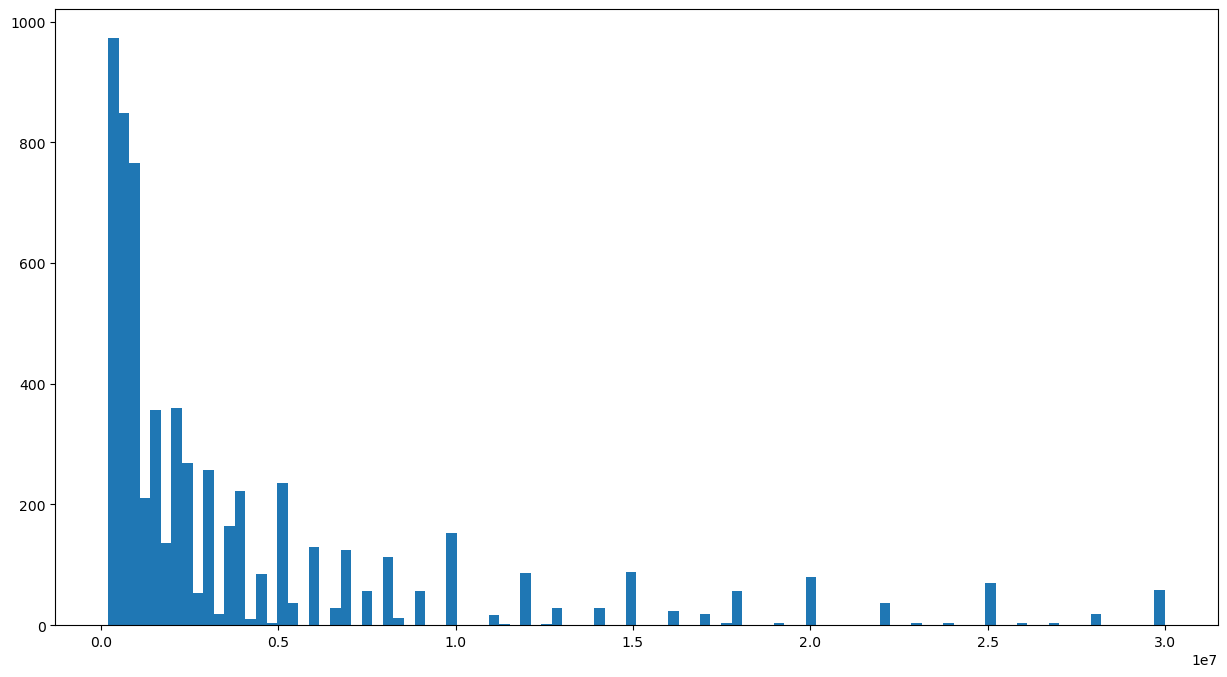

In [335]:
# testing on a new dataframe before committing the changes
df_new2 = df_new[df_new['highest_value'] <= 30000000]

# testing on a new dataframe before committing the changes
plt.figure(figsize=(15,8))
plt.hist(df_new2['highest_value'], bins=100);

In [336]:
df_new2.shape

(6309, 18)

In [337]:
# committing changes
# # cutting highest_value outliers higher than 40000000 to achieve a more normal distribution
df_new = df_new[df_new['highest_value'] <= 40000000]


In [338]:
# Accurecy - Outlier *CHECKING AFTER CUTTING*

# Convert categorical variables using OneHotEncoding
numerical_feats_2 = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

cetegorical_feats_2 = ['team', 'position']

In [339]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats_2:
    print(df_new[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Cardiff City         26
Portimonense SC      26
Watford FC           26
                     ..
Bayern Munich         2
Gaziantep FK          2
Manchester City       2
FC Barcelona          2
Real Madrid           1
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          667
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Defender                         1
Attack                           1
Name: count, dtype: int64


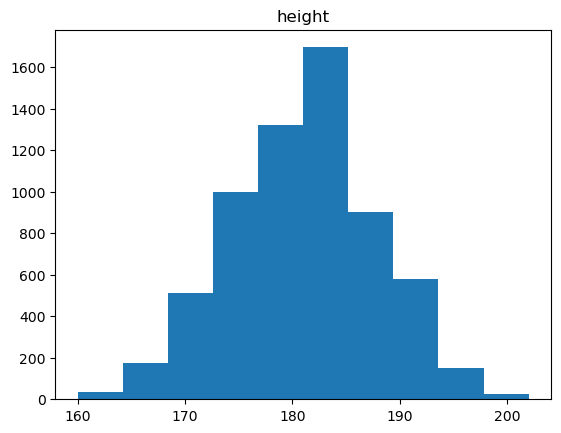

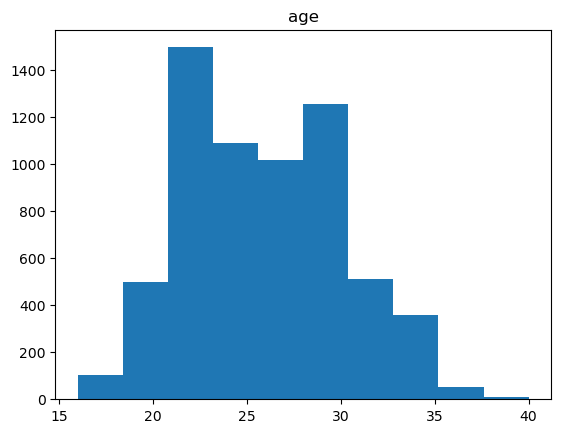

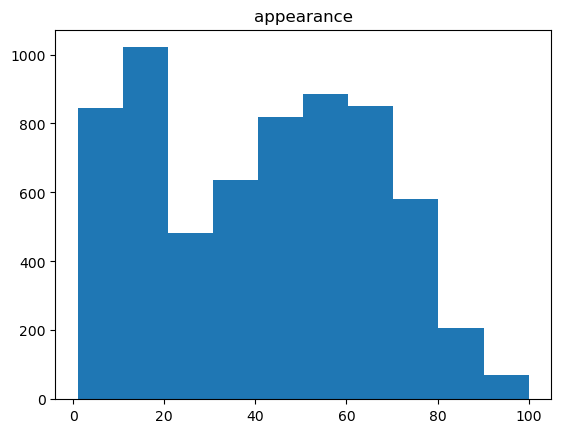

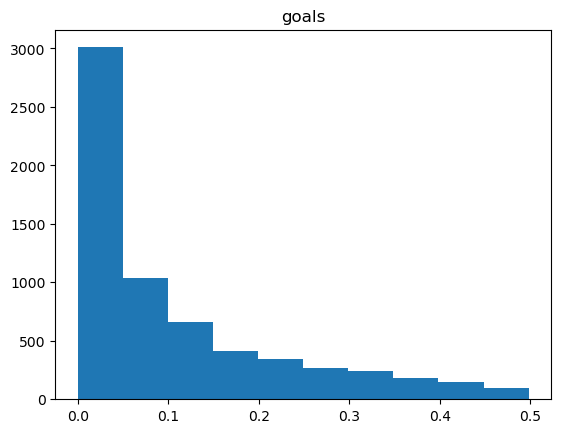

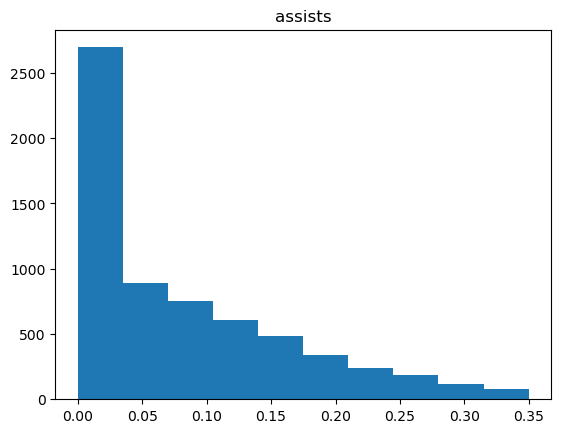

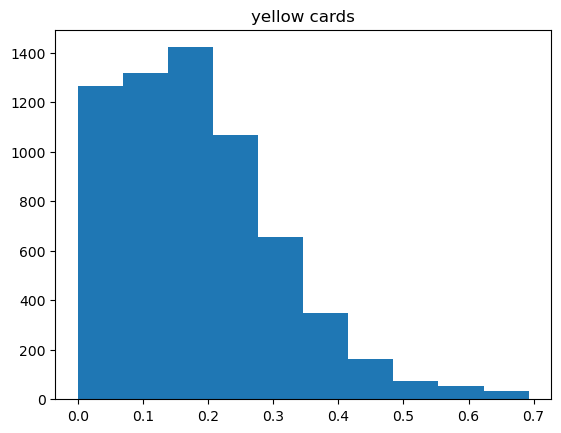

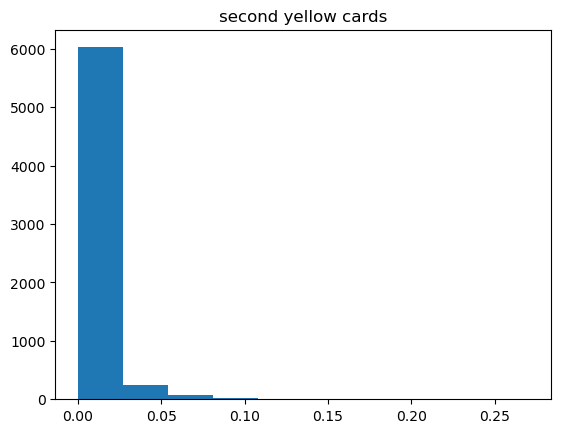

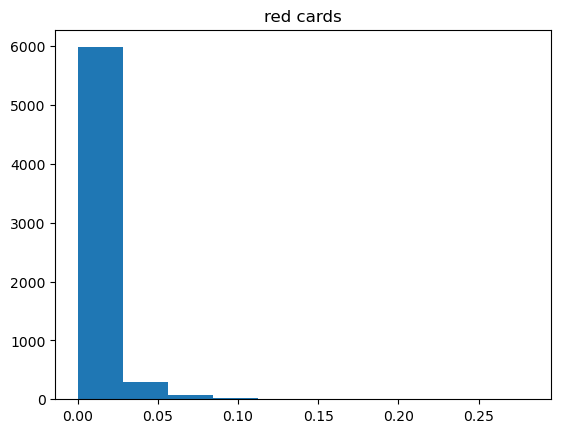

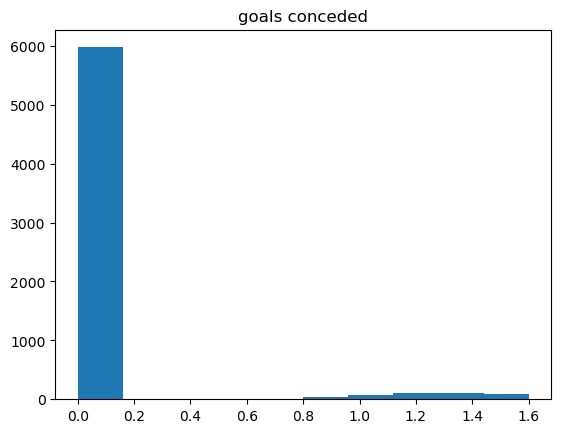

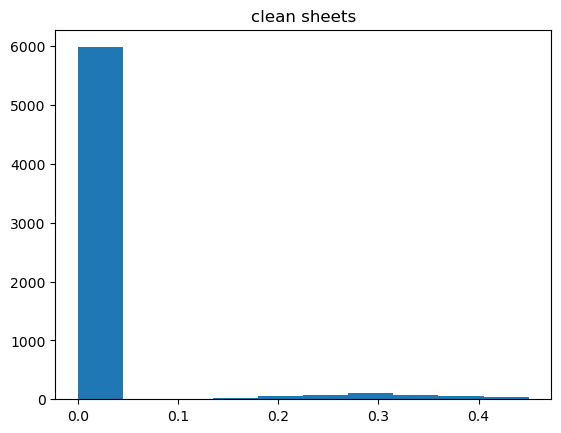

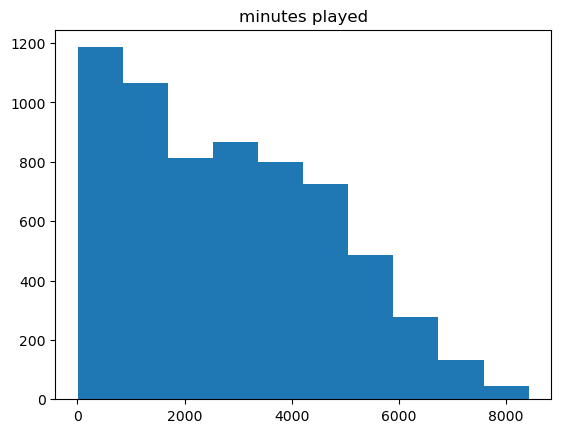

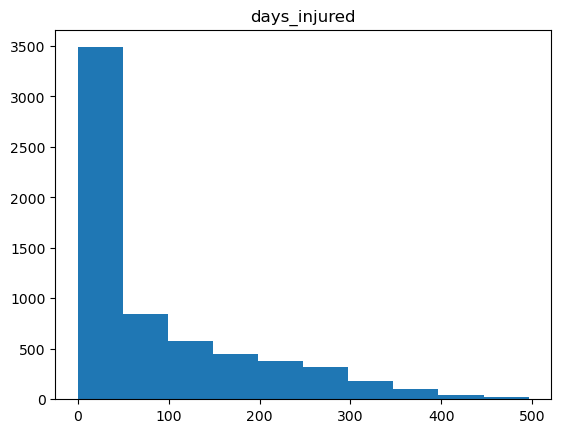

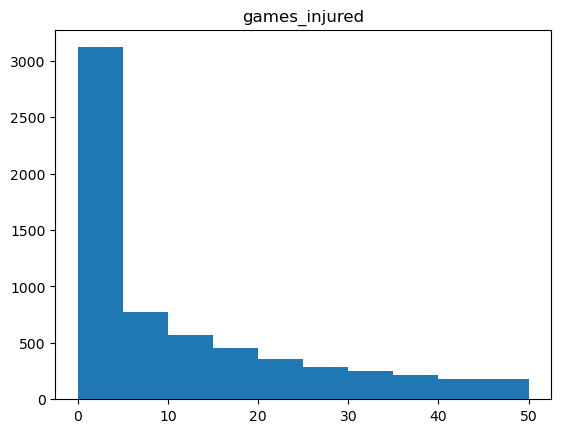

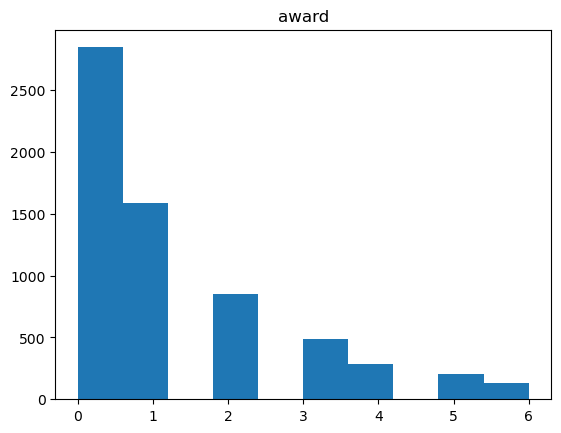

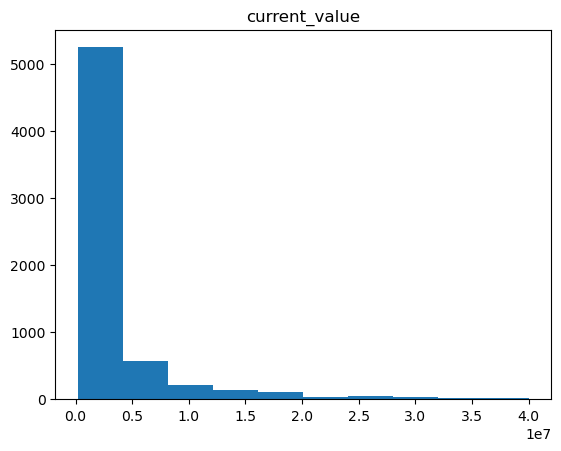

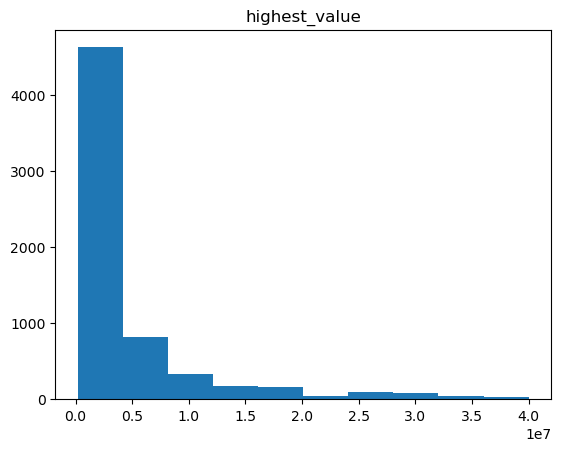

In [340]:
# looping through the numerical columns and plotting them
# to help detect outliers
for i in numerical_feats_2:
    plt.hist(df_new[i]);
    plt.title(i)
    plt.show()

In [341]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

> no missing values

In [342]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

> no errors to correct

In [343]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

> Dealth with them above

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [344]:
# analyzing the data using sweetviz

import sweetviz as sv

# report = sv.analyze(df_new)
# report.show_html('Report.html')


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

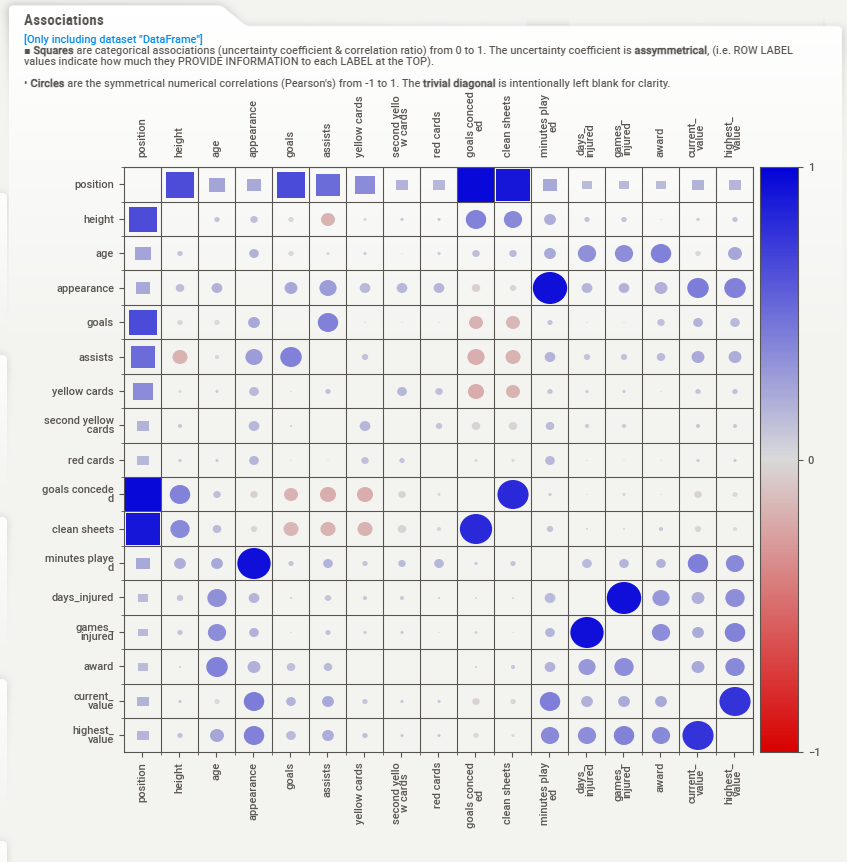

In [345]:
df_new.to_csv('final_data_cleaned.csv')